# Assignment 1 - Sentiment analysis

## 0. Instructions

To complete the assignment please do the following  steps (all the three are requred to get the full credits): 

1. **Notebook**. Upload to Canvas a filled notebook with answers (this file). 
Please enter the questions inside this notebook where appropriate in the designated cells.

2. **Scripts**. In *Practical* part of this notebook you will be asked to implement different classifiers' architectures. Upload to Canvas your code which implements solutions to these parts in the form of *.py files (not *.ipynb notebooks) of the models:

  - ``classifier_lr.py`` -  an LR based classifier
  - ``classifier_ffnn.py`` - a FFNN based classifier
  - ``classifier_rnn.py`` - an RNN based classifier

These scripts should have the specific struction as it is shown in the baseline soultion [here](https://github.com/skoltech-nlp/filimdb_evaluation/blob/master/classifier.py). So, you should implement your ``train`` and ``classify`` functions (``pretrain`` if needed). Your model should be implemented as a special class/function in this script (be sure if you add any outer dependencies that everything is improted correctly and can be reproducable).

  Each of these Python classifiers will be renamed to "classifier.py" and automatically evaluated using the evaluate.py script. Please make sure that they did not contain any dependencies which are specific to your system.

  *Important*: to make sure everything works, please use ONLY the following software configuration (no matter which operating system you use): Anaconda 2020.07  distribution for Python 3.8 and PyTorch 1.3. The preferred way to install PyTorch is "conda install -c pytorch pytorch". There should be no additional libraries used: Anaconda already provides a sufficient number of them. If you need something just select from these available. Test for no the absence of dependencies by creating a virtual environment. 

3. **Shared task.** After the implementation of models' architectures you are asked to participate in the [competition](https://competitions.codalab.org/competitions/30517) to solve **Sentiment Analysis for IMDb Movie Review** task using your implemented code. 

You should use your classifier scripts from the previous part to train, validate, and generate predictions for the public and prevate test sets. For this you should use [``evaluate.py``](https://github.com/skoltech-nlp/filimdb_evaluation/blob/master/evaluate.py) script. It will produce predictions (preds.tsv) for the dataset and score them if the true labels are present. You can use these scores to evaluate your model on dev set and choose the best one. Be sure:

1. To download the [dataset](https://github.com/skoltech-nlp/filimdb_evaluation/blob/master/FILIMDB.tar.gz) and unzip it in the same folder where ``evaluate.py`` is.
2. to put your ``classifier.py`` and ``evaluate.py`` scripts in the same folder. 

The models can be trained on your local machines on CPU. However, if you work in Colab you can dowload data and scripts with ``wget`` command and run them from notebook cells. 

Upload obtained TSV file with your predictions (preds.tsv) in ``.zip`` for the best results on the dev set using LR, FFNN, and RNN  respectively to the public leaderboard of the competition. 

  *Important*: You have to upload predictions based on LR model in the sub-task for LR (https://competitions.codalab.org/competitions/25623), predictions based on FFNN model in the sub-task for FFNN (https://competitions.codalab.org/competitions/25623), and predictions based on RNN model in the sub-task for RNN (https://competitions.codalab.org/competitions/25623). So in each track there is a fair competition (only the same models are compared). Your scores will not be taken into account if you submit it in the wrong sub-task, e.g. LR preditions to FFNN or RNN sub-task!

Please, provide here in the notebook your user name in Codalab competition that we can recognize you in the leaderboard.


**YOUR USERNAME IN THE CODALAB LEADERBOARD:**

```

annakey

```

## 1. Theoretical part

This part contains some questions about the models and concepts.

### 1.1 Logistic Regression

Let us introduce the following notation:

$(x_{\{1\}}, y_{\{1\}}), \ldots, (x_{\{N\}}, y_{\{N\}})$ --- train set of size N, 

$x_{\{i\}} \in\mathbb{R}^M$ --- feature vector of the $i^{th}$ sample from train set, $M$ --- number of features, 

$y_{\{i\}} \in \{0, 1\}$ --- label (class) of the $i^{th}$ sample, 

$w\in\mathbb{R}^{M+1}$ --- weight vector in LogReg.

_**NB:**_ linear transofrmations on $x_{\{i\}}$ is as follows: 
$$
w_0 + w^Tx_{\{i\}} = w_0+w_1*x_{\{i\},1}+\ldots+w_M*x_{\{i\},M},
$$

where $w_0$ stands for intercept term (bias).

For the convenience of implementation we will set $x_{\{i\},0} = 1$. In other words, we will add 1 to vectors $x_{\{i\}}$. Therefore, linear transformations will be the following:

$$w_0*1+w_1*x_{\{i\},1}+\ldots+w_M*x_{\{i\},M} \equiv w^T[1;x_{\{i\}}]$$


1. Find the derivative of the sigmoid function $\sigma(z)$ and express it in terms of sigmoid, considering $z$ to be scalar 
$$ 
\sigma(z) = {\frac {1}{1+e^{-z}}}
$$



$$\sigma^{'}(z) = \frac{e^{-z}}{(1+e^{-z})^2} = \frac{e^{-z}+1-1}{(1+e^{-z})^2} =\frac{1}{{1+e^{-z}}}-\frac{1}{(1+e^{-z})^2} = \sigma(z) -  \sigma^2(z)  = \sigma(z)(1-\sigma(z))$$


2. Prove that:  

$$ \sigma(-z) = 1 - \sigma(z)$$

$$1-\sigma(z) = 1 - \frac{1}{1+e^{-z}} = \frac{1+e^{-z}-1}{1+e^{-z}} = \frac{e^{-z}e^z}{(1+e^{-z})e^z} = \frac{1}{1+e^z} = \sigma(-z)$$

3. Write out the formula of hypothesis $h_w(x)$ for logistic regression.

$$
h_w(x) = \sigma([1;x]^Tw) = \frac{1}{1+e^{-w_0 - w^Tx}}
$$

4. Plot the values of Binary Cross-Entropy error function for one sample from positve class and one sample from negative, depending on the logreg output $\hat y=h_w(x)$. What the loss function value will be equal to, given zero weights (right after the initialization)?
$$ bce(y, \hat y)= -y \log \hat y - (1-y) \log (1 - \hat y)$$

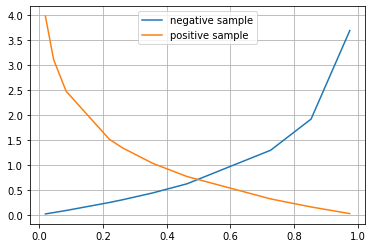

In [117]:
#taken from https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-2.2, -1.4, -.8, .2, .4, .8, 1.2, 2.2, 2.9, 4.6])
y = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0])

logr = LogisticRegression(solver='lbfgs')
logr.fit(x.reshape(-1, 1), y)

y_pred = logr.predict_proba(x.reshape(-1, 1))[:, 1].ravel()
loss = log_loss(y, y_pred)
        
l0 = -np.log(1-y_pred)
l1 = -np.log(y_pred)

plt.plot(y_pred, l0, label = 'negative sample')
plt.plot(y_pred, l1, label = 'positive sample')
plt.legend()
plt.grid()
plt.show()

$$ bce(y, \hat y)= -y \log \hat y - (1-y) \log (1 - \hat y) = -y \log \sigma(z) + (1-y) \log (1-\sigma(z)) =
\\=-y \log (1/2) + (1-y) \log (1/2) = -\log (1/2) = \log(2)
$$

5. Calculate gradient for cost function $\nabla_w L(w, x_{\{1\}},\ldots,x_{\{N\}})$ for binary (2 class) logistic regression. As evaluation function use cross-entropy with l2 regularization:
$$ L(w,x_{\{1\}},\ldots,x_{\{N\}}) = - \frac1{N} \sum_{i=1}^N(y_{\{i\}} \log h_w(x_{\{i\}}) + (1 - y_{\{i\}}) \log (1 - h_w(x_{\{i\}}))) + \alpha\sum_{j=1}^M(w_j)^2$$

$$h_w(x_{\{i\}}) = \frac{1}{1+e^{-w^Tx_i}}$$

$$L(w,x_{\{1\}},\ldots,x_{\{N\}}) = - \frac1{N} \sum_{i=1}^N\left(y_{\{i\}} \log \frac{1}{1+e^{-w^Tx_i}} + (1 - y_{\{i\}}) \log \left(1 - \frac{1}{1+e^{-w^Tx_i}}\right)\right) + \alpha\sum_{j=1}^M(w_j)^2 =
\\ = - \frac1{N} \sum_{i=1}^N\left((1 - y_{\{i\}}) \log e^{-w^Tx_i} - \log (1+e^{-w^Tx_i}))\right) + \alpha\sum_{j=1}^M(w_j)^2  =
\\= - \frac1{N} \sum_{i=1}^N\left((1 - y_{\{i\}}) (-w^Tx_i)- \log (1+e^{-w^Tx_i}))\right) + \alpha\sum_{j=1}^M(w_j)^2. $$

$$
\nabla_w L(w, x_{\{1\}},\ldots,x_{\{N\}}) = - \frac1{N} \sum_{i=1}^N\left((1 - y_{\{i\}}) (-x_i)+ \frac{x_i}{ (1+e^{w^Tx_i})}\right) + 2\alpha\sum_{j=1}^M(w_j) =
\\ = - \frac1{N} \sum_{i=1}^N\left(x_i y_{\{i\}} + x_i\left(\frac{1}{ (1+e^{w^Tx_i})}-1\right)\right) + 2\alpha\sum_{j=1}^M(w_j) =~~ as~~<h_w(-z) = 1 - h_w(z)> =
\\ = - \frac1{N} \sum_{i=1}^N\left(x_i y_{\{i\}} - x_i h_w(x_{\{i\}})\right) + 2\alpha\sum_{j=1}^M(w_j) = \frac1{N} \sum_{i=1}^N\left(x_i[ h_w(x_{\{i\}}) - y_{\{i\}}]\right) + 2\alpha\sum_{j=1}^M(w_j) 
$$

_**NB:**_ Regularization component $\sum_{j=1}^M(w_j)^2$ does not incluse $w_0$, as it is responsible for overall shift only. It may be of any value, whereas $L_2$ regularization seeks to minimmize $w_i$ values.

6. Write out the formula for the update of vector $w$ with parameters using stochastic gradient descent optimization

$$ w^{(t+1)} = w^{(t)} - \eta \nabla_w L(w;x^{(i)};y^{(i)}) $$

7. Prove that binary cross-entropy evaluation function for binary logistic regression has the only one minimum

$$ bce(y, \hat y)= -y \log \hat y - (1-y) \log (1 - \hat y)$$

$$\frac{\partial bce}{\partial y}  = \frac{-e^{-z}}{(1+e^{-z})} -\frac{e^z}{1+e^z} <0 $$

$$ \frac{\partial^2 bce}{\partial y^2} = \frac{e^{-z}}{(1+e^{-z})^2} + \frac{e^{-z}}{(1+e^-z)^2} >0 $$



Therefore, function has only 1 minimum.

8. Show that minimization of Binary Cross Entropy loss function for logistic regression is equivalent to the following function (sum over samples and regularization component is omitted):
$$ softplus(-tw^Tx),$$

where

$$
softplus(x)=log(1+e^x)$$

$$t=2y-1 \in \{-1+1\}$$


$$
bce = -y\log(\frac{1}{1+e^{-w^Tx}})-(1-y)\log(\frac{1}{1+e^{w^Tx}}) = y\log(1+e^{-w^Tx})+(1-y)\log(1+e^{w^Tx})
$$

if $y = 0$ (or $t = -1$):
$$bce = \log(1+e^{w^Tx}) = softplus(w^Tx)$$

if $y = 1$ (or $t = 1$):
$$bce = \log(1+e^{-w^Tx}) = softplus(-w^Tx)$$

### 1.2 Feed-forward Neural Network

Let use the fllowing notation:

$(x_{\{1\}}, y_{\{1\}}), \ldots, (x_{\{N\}}, y_{\{N\}})$ --- train set of size $N$

$x_{\{i\}} \in\mathbb{R}^M$, where $i$ is the review index, 

$M=s^{(0)}$ --- number of features or dictionary size, 

$y_{\{i\}} \in \{0, 1\}$, $s^{(l)}$ - number of neurons in the layer $l$, 

$W^{(l)}$ --- parameter matrix of $l^{th}$ layer of size $s^{l} \times (s^{l-1}+1)$ (as we add bias), where

$l=\{1,2,\cdots,L\}$, $L$ --- number of layers (number of hidden layers is equal to $L-1$)


Feed-forward Neural Network example with two layers (one hidden layer):

![img](http://panchenko.me/figures/nn.jpg)


Feed-forward propagation:

$a^{(0)} = x_{\{i\}} $

$z^{(1)} = W^{(1)} [1, a^{(0)}] $

$a^{(1)} = tanh(z^{(1)})$

$z^{(2)} = W^{(2)}[1, a^{(1)}] $

$a^{(2)} = softmax(z^{(2)}) $


Backpropagation:
...

1. Calculate the derivative for $\tanh(z)$ function and express it in terms of $tanh(z)$, considering $z$ to be a scalar. Transform your answer, so that the exponent will be used only once while computing $\tanh(z)$ and its derivative.
$$ \tanh(z) = {\frac {e^{z}-e^{-z}}{e^{z}+e^{-z}}}$$


$$
(\tanh(z))^{'} = \frac{2e^{2z}(e^{2z}+1)-2e^{2z}(e^{2z}-1)}{(e^{2z}+1)^2} = \frac{4e^{2z}}{(e^{2z}+1)^2} = 1 - tanh^2(z)
$$

2. Write out the cross entropy loss function $L(W^{(1)}, \ldots, W^{(L)},x_{\{1\}},\ldots,x_{\{N\}})$ for neural network with one hidden layer ($L=2$), and then generalize it for neural network with $L-1$ hidden layers and for multiclass classification (with $K$ classes). Use $\tanh(z)$ activation function for hidden layer,  $softmax(z)$ for output layer.

$$
L_{CE} = - \sum_{i = 1}^K y_i \log \hat y  = - \sum_{i = 1}^K y_i \log \left(\frac{e^{z_i^L}}{\sum_{p= 1}^K e^{z_p^L}}\right) =  - \sum_{i = 1}^K y_i (z_i^L - \log \sum_{p= 1}^K e^{z_p^L} )
$$

3. Demonstrate that $softmax(z+c)=softmax(z)$, where ${c}$ -- vector with equal components

$$
z+c = (z_1+c, ..., z_k+c)
\\softmax(z_i+c) = \frac{e^{z_i+c}}{\sum_{j= 1}^ke^{z_j+c}} = \frac{e^c e^{z_i}}{e^c \sum_{j= 1}^ke^{z_j}} = softmax(z_i)
$$

4. How many parameters does the neural network have? Inputs vectors size is $M$, output vectors size is $K$ and the number of neurons is $H$.

For the weights:
$$MK+KH$$

For the bias components:
$$ K+H$$

In total: 
$$MK+KH+K+H$$

5. Provide the formula for the $\delta^{(L)}$ --- gradient of loss function based on pre-activation on the last layer. $z^{(L)}$.

 $$
 \delta^{(L)}_j = \frac{\partial L_{CE}}{\partial z^{(L)}_j} = - \sum_{i = 1}^K y_i \left(1_{i = j} - \frac{e^{z_j^L}}{\sum_{p= 1}^K e^{z_p^L}}\right)  =  - \sum_{i = 1}^K y_i (1_{i = j} - a_j^L) =  
 \\=a_j^L \sum_{i = 1}^K y_i - \sum_{i = 1}^K y_i 1_{i = j} = 
 a_j^L - y_j $$

6. Provide the formula for $\delta^{(l)}$ --- gradient of loss function on $z^{(l)}$ through $\delta^{(l+1)}$.

$$
\delta^{(l)} = \frac{\partial L_{CE}}{\partial a^l} \frac{\partial a^l}{\partial z^{(l)}} = \delta^{(l+1)} W^{(l+1)} * g^{'}(z^{(l-1)})
\\ \frac{\partial L_{CE}}{\partial a^l} =  \frac{\partial L_{CE}}{\partial z^{(l)}} \frac{\partial z^{(l)}}{\partial a^l} = \delta^{(l+1)} * W^{(l+1)} 
\\ \frac{\partial a^l}{\partial z^{(l)}} = g^{'}(z^{(l-1)})
$$

7. Provide the formula for $\nabla_{W^{(l)}} L$ --- gradient of loss function on weights $W^{(l)}$, using $\delta^{(l)}$.

$$ 
\nabla_{W^{(l)}} L = \frac{\partial L_{CE}}{\partial W^{(l)}} = \frac{\partial L_{CE}}{\partial a^l} \frac{\partial a^l}{\partial z^{(l)}} \frac{\partial z^{(l)}}{\partial W^{(l)}} = \delta^{(l)}  \frac{\partial z^{(l)}}{\partial W^{(l)}} =   \delta^{(l)T} a^{(l-1)}
$$

### 1.3 Word Embeddings

1. Write down objective functions of the Skip-Gram word embedding models assuming negative sampling (SGNS).

$$
J = -\log \sigma( u_i * v_o) - \sum_{k=1}^K \log \sigma( -u_i * v_k)
$$

2. Write down derivatives with respect to the parameters (weights) of this loss function.

Using the fact that $(\sigma(z))^{'} = \sigma(z)(1 - \sigma(z))$

$$
\frac{\partial J}{\partial u_i} = -\frac{(\sigma( u_i * v_o))^{'}}{\sigma( u_i * v_o)}-\sum_{k=1}^K \frac{(\sigma( -u_i * v_k))^{'}}{\sigma( -u_i * v_k)} =(\sigma( u_i * v_o) -1)v_o - \sum_{k=1}^K (\sigma( -u_i * v_k) - 1) v_k  
$$

$$
\frac{\partial J}{\partial v_o} = (\sigma( u_i * v_o) -1)u_i
$$

$$
\frac{\partial J}{\partial v_k} = - (\sigma( -u_i * v_k) - 1)u_i
$$

### 1.4 Recurrent Neural Networks

#### 1.4.1 Computing probability

Consider a sequence $x_1, x_2, ..., x_T$, where $x_i$ is an index of token in the vocabulary $V$ and a two-layer language model based on the LSTM neural network. Let's assume that this network generates an estimation $\hat{y_i}[w] = \hat{P}(x_1, ..., x_{i-1})$ of probability that token $w$ follows the sequence of tokens $x_1, ..., x_{i-1}$. 

1. Write formulas for the forward pass of this network: how to estimate the $\hat{y_i}[w] = \hat{P}(x_1, ..., x_{i-1})$? For simplicity, write first formulas for the individual layers, then use them to write the full formula for the forward pass.


At time $t$, the input gate, the forget gate, and the output gate,
denoted as $i_t$, $o_t$, and $f_t$ respectively can
be calculated using the following equations:

$$
\begin{array}{l}
\mathrm{f}_{\mathrm{t}}=\sigma_{\mathrm{g}}\left(\mathrm{W}_{\mathrm{f}} \mathrm{x}_{\mathrm{t}}+\mathrm{U}_{\mathrm{f}} \mathrm{h}_{\mathrm{t}-1}+\mathrm{b}_{\mathrm{f}}\right) \\
\mathrm{i}_{\mathrm{t}}=\sigma_{\mathrm{g}}\left(\mathrm{W}_{\mathrm{i}} \mathrm{x}_{\mathrm{t}}+\mathrm{U}_{\mathrm{i}} \mathrm{h}_{\mathrm{t}-1}+\mathrm{b}_{\mathrm{i}}\right) \\
\mathrm{o}_{\mathrm{t}}=\sigma_{\mathrm{g}}\left(\mathrm{W}_{\mathrm{o}} \mathrm{x}_{\mathrm{t}}+\mathrm{U}_{\mathrm{o}} \mathrm{h}_{\mathrm{t}-1}+\mathrm{b}_{\mathrm{o}}\right) \\
\tilde{\mathrm{C}}_{\mathrm{t}}=\tanh \left(\mathrm{W}_{\mathrm{C}} \mathrm{x}_{\mathrm{t}}+\mathrm{U}_{\mathrm{C}} \mathrm{h}_{\mathrm{t}-1}+\mathrm{b}_{\mathrm{C}}\right)
\end{array}
$$
$$
\begin{aligned}
C_{t} &=f_{t} * C_{t-1}+i_{t} * \tilde{C}_{t} \\
h_{t} &=o_{t} * \tanh \left(C_{t}\right)
\end{aligned}
$$


$\overrightarrow{\boldsymbol{h}}$ is iteratively calculated using inputs in a positive
sequence from time $T − n$ to time $T − 1$, while $\overleftarrow{\boldsymbol{h}}$ is calculated using the reversed inputs
from time $T − n$ to $T − 1$.

An output vector: $\hat y_{t}=\sigma\left(\vec{h}_{t}, \overleftarrow{h}_{t}\right)$

2. How to estimate the probability of a sequence of tokens $x_1, x_2, ..., x_T$ ie what is the probability of $\hat{P}(x_1,...,x_T)$?

$\hat{P}(x_1,...,x_T) = \hat{P}(x_T|x_1,...,x_{T-1}) \hat{P}(x_1,...,x_{T-1})$

#### 1.4.2 Vanishing gradient problem



What is the vanishing / exploiding gradient problem in Elman recurrent neural networks? Write down update equations for Elman RNN and explain what is causing the vanishing / exploiding gradient issue.

 - Gradients **vanish** (*explode*) exponentially across time steps when the recurrent connection is **<1** (*>1*)
 - Problem is connected to the fact that on every step we multiply the weight matrix by itself. Therefore, a product of n real numbers can **vanish to zero** or *explode to infinity*, so does this product of matrices.

 Simple recurrent networds (Elman quations)
 $$h_{t}=\sigma_{h}\left(W_{h} x_{t}+U_{h} h_{t-1}+b_{h}\right) \\
y_{t}=\sigma_{y}\left(W_{y} h_{t}+b_{y}\right)$$


The exploding gradients problem refers to the large increase in the norm
of the gradient during training. Such events are due to
the explosion of the long term components, which can grow exponentially more than short term ones. The
vanishing gradients problem refers to the opposite behaviour, when long term components go exponentially
fast to norm 0, making it impossible for the model to
learn correlation between temporally distant events.

More explanation here: http://proceedings.mlr.press/v28/pascanu13.pdf


How does LSTM help prevent the vanishing (and exploding) gradient problem in a recurrent neural network? Write down the equations of LSTM and explain how technically this schema is better than the Elman recurrent neural networks.

Taken from https://en.wikipedia.org/wiki/Long_short-term_memory

In theory, classic (or "vanilla") RNNs can keep track of arbitrary long-term dependencies in the input sequences. The problem of vanilla RNNs is computational (or practical) in nature: when training a vanilla RNN using back-propagation, the gradients which are back-propagated can "vanish" (that is they can tend to zero) or "explode" (that is, they can tend to infinity), because of the computations involved in the process, which use finite-precision numbers. RNNs using LSTM units partially solve the vanishing gradient problem, because LSTM units allow gradients to also flow unchanged. However, LSTM networks can still suffer from the exploding gradient problem. 

LSTM configuration:

$$
\begin{array}{l}
{f_{t}=\sigma_{g}\left(W_{f} x_{t}+U_{f} h_{t-1}+b_{f}\right)} \\
{i_{t}=\sigma_{g}\left(W_{i} x_{t}+U_{i} h_{t-1}+b_{i}\right)} \\
{o_{t}=\sigma_{g}\left(W_{o} x_{t}+U_{o} h_{t-1}+b_{o}\right)} \\
{c_{t}=f_{t} \circ c_{t-1}+i_{t} \circ \sigma_{c}\left(W_{c} x_{t}+U_{c} h_{t-1}+b_{c}\right)} \\
{h_{t}=o_{t} \circ \sigma_{h}\left(c_{t}\right)}
\end{array}
$$
where 
- $x_{t}$: input vector to the LSTM unit
- $f_{t}$: forget gate's activation vector
- $i_{t}$: input/update gate's activation vector
- $o_{t}$: output gate's activation vector
- $h_{t}$: hidden state vector also known as output vector of the LSTM unit
- $c_{t}$: cell state vector
- $W \in R^{hxd}$, $U \in R^{hxh}$and $b \in R^{h}$: weight matrices and bias vector parameters which need to be learned during training
- $\sigma $: activation functions

LSTM mixes both notions: long-term memory in the weights and short-term memory in the activations. Pointwise multiplication regulates how much is passed through, based on inputs. As the weight
remains constant, error can flow across multiple time steps without vanishing or exploding.
Intuitively, the internal state is like a conveyor belt that runs straight down the entire chain with only
minor linear interactions which makes it is feasible for information to flow unchanged across multiple
time steps.

Therefore, the LSTM architecture preserves information over many timesteps.

## 2. Practical part





The goal of this part is to implement text classifiers based on logistic regression (LR), feed-forward neural netword (FFNN) or recurrent neural network (RNN) where pre-trained word embeddings are used as features. For LR and FFNN you need to simply average word embeddings of a sentence (perform average pooling of word vectors) and they apply the LR/FFNN to the output representation. In case of RNN you feed one embedding per input token.

### 2.1 Logistic Regression

2.1.1 Implementation of the model 

The goal of this section to implement using **pytorch** a text categorization model using logistic regression. Following the steps below, you can complete corresponding parts in your ``classifier_lr.py`` script and apply the code for sentiment classification task. 

**Important**: You are not expected to implement logistic regression training from scratch in this (updated) version of the task to get full scores. You are free to use optimization package of pytorch. The implementations in this assignment could and should be based on the models from the second and third seminars (and their variants by you). 

To implement the model, you can follow the steps below. 

1. Load the dataset, preprocess and tokenize it. Build a dictionary with unique tokens from the train set.

2. To train our logistic regression, our train and test data should be converted to matrices of size $N * V$ ($N$ -- number of reviews, $V$ -- vocabulary size). In this matrix $i^{th}$ row contains bag-of-words vector, $j^{th}$ component is the absolute frequency of $j^{th}$ token from the vocabulary in the $i^{th}$ review.  Use word embeddings as the initial embedding matrix.  First, load embeddings from the disk, then select the correct subset of embeddings for the words that are actually present in the data, and finally setting the Embedding layer’s weight matrix as the loaded
subset.

3. Add a sigmoid function.

4. Initialization. Write weights initialization function.

5. Forward pass. Write a function that compute the objective function of logistic regression.

6. Training loop. Write the function that makes a gradient descent. It is recommended to use mini-batch gradient descent: split your train data to mini-batches (100-500) samples, on each iteration calculate the gradient not for all train set, but on the current batch only. It will speed up one iterqtion computation time and the model will converge faster.
 

#### Make all the necessary imports:

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
from tqdm.notebook import tqdm
import numpy as np
from torch.utils.data import DataLoader
from tqdm import tqdm

import pandas as pd
pd.options.display.max_colwidth = 150
from collections import Counter

from torchtext.vocab import Vectors
from IPython.display import clear_output
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [3]:
# import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [4]:
from joblib import Memory


CACHE_DIR = 'cache'
if not os.path.isdir(CACHE_DIR):
    os.mkdir(CACHE_DIR)
    
MEMORY = Memory(CACHE_DIR, verbose=0) 

In [5]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.probability import FreqDist
from torchtext.vocab import Vocab
import matplotlib.pyplot as plt

wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'[a-z]+')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### 1.Preprocessing

#### Load the dataset, preprocess and tokenize it:


In [6]:
def read_data(path):
    data_path = 'FILIMDB/'
    data_path += path
    data= []
    with open(data_path) as file:
        for line in file:
            data.append(line.strip())
    return data

In [7]:
train_texts, test_texts, dev_texts = read_data('train.texts'),read_data('test.texts'),read_data('dev.texts') #with labels
dev_b_texts, test_b_texts = read_data('dev-b.texts'),read_data('test-b.texts') #without labels
train_labels , dev_labels, dev_b_labels =  read_data('train.labels'), read_data('dev.labels'), read_data('dev-b.labels') #labels

In [8]:
def preprocess(document):
    """
    TODO: write your preprocessing function, including following steps:
    - convert the whole text to the lowercase;
    - tokenize the text;
    - remove stopwords;
    - lemmatize the text.
    Return: string, resulted list of tokens joined with the space.
    """

    # Convert to lowercase
    document = document.lower()
    # Tokenize
    words = tokenizer.tokenize(document)
    # Removing stopwords
    words = [word for word in words if not word in stop_words]
    # Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
      words = [wordnet_lemmatizer.lemmatize(x, pos) for x in words]
    
    #return " ".join(words)
    return words

In [9]:
def labelencoding(label):
  if label == 'neg':
    return 0
  else:
    return 1

#### Pretrained word2vec embeddings:

In [10]:
# download google word2vec pretrained embeddings

# !wget -P ./ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

In [11]:
#Pretrained embeddings

from gensim.models import KeyedVectors
EMBEDDING_FILE = 'GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)
x = word2vec.word_vec("test")

In [12]:
def get_phrase_embedding(tokens):
    """
    Convert phrase (tokens) to a vector by aggregating it's word embeddings. See description above.
    """

    # average word vectors for all words in tokenized phrase
    # skip words that are not in model's vocabulary
    # if all words are missing from vocabulary, return zeros
    model = word2vec
    
    vector = np.zeros([model.vector_size], dtype='float32')

    used_words = 0
    
    for word in tokens:
        if word in model:
            vector += model.wv[word]
            used_words += 1
    
    if used_words > 0:
        vector = vector / used_words
    
    return vector

#### Form train and validation sets:

In [13]:
train_data = pd.DataFrame({'label': train_labels, 'text': train_texts})
train_data['preprocessed text'] = train_data['text'].apply(preprocess)
train_data['word2vec'] = train_data['preprocessed text'].apply(get_phrase_embedding)
train_data['label'] = train_data['label'].apply(labelencoding)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


In [14]:
dev_data = pd.DataFrame({'label': dev_labels, 'text': dev_texts})
dev_data['preprocessed text'] = dev_data['text'].apply(preprocess)
dev_data['word2vec'] = dev_data['preprocessed text'].apply(get_phrase_embedding)
dev_data['label'] = dev_data['label'].apply(labelencoding)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


In [15]:
dev_b_data = pd.DataFrame({'label': dev_b_labels, 'text': dev_b_texts})
dev_b_data['preprocessed text'] = dev_b_data['text'].apply(preprocess)
dev_b_data['word2vec'] = dev_b_data['preprocessed text'].apply(get_phrase_embedding)
dev_b_data['label'] = dev_b_data['label'].apply(labelencoding)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


In [16]:
train_data.head()

,label,text,preprocessed text,word2vec
0,0,"If the myth regarding broken mirrors would be accurate, everybody involved in this production would now face approximately 170 years of bad luck, ...","[myth, regard, break, mirror, would, accurate, everybody, involve, production, would, face, approximately, year, bad, luck, lot, mirror, fall, lit...","[0.0632519, 0.024611833, -0.0029578428, 0.08323689, -0.05836533, 0.04175226, 0.06837725, -0.065943874, 0.09848741, 0.07640332, -0.041728828, -0.11..."
1,1,I gave this movie a 10 because it needed to be rewarded for its scary elements and actors AND my god the enging! The thing is I don't want to tell...,"[give, movie, need, reward, scary, element, actor, god, enging, thing, want, tell, anyone, anything, act, story, ruin, movie, recommend, go, strai...","[0.12340576, -0.050698243, 0.0038085938, 0.14730957, -0.089257814, 0.08005127, 0.16036499, -0.031972658, 0.057285156, 0.0700486, -0.042869873, -0...."
2,0,"After watching the first 20mn of Blanche(sorry I couldn't take more of it), I have now confirmed she does not. <br /><br />Basically, this ""movie""...","[watch, first, mn, blanche, sorry, take, confirm, br, br, basically, movie, insult, real, french, actor, participate, farcical, piece, junk, start...","[0.07920438, 0.013658796, 0.039840333, 0.12951201, -0.03977636, 0.07290286, 0.07033212, -0.07499622, 0.055973597, 0.087242536, -0.07291703, -0.142..."
3,0,"Weak plot, unlikely car malfunction, and helpless fumbling characters. At first I thought this movie was made during the seventies, since the pict...","[weak, plot, unlikely, car, malfunction, helpless, fumble, character, first, think, movie, make, seventy, since, picture, quality, well, storyline...","[0.061059218, 0.02962083, 0.010761848, 0.08975513, -0.06606948, 0.026293535, 0.06512833, -0.019852858, 0.074336715, 0.055718202, -0.015828647, -0...."
4,1,"Where the Sidewalk Ends (1950)<br /><br />Where One Ends, Another Begins<br /><br />This is a prototypical film noir, and as such, pretty flawless...","[sidewalk, end, br, br, one, end, another, begin, br, br, prototypical, film, noir, pretty, flawless, style, content, point, view, photography, ni...","[0.06204649, 0.034683503, -0.015387179, 0.08254904, -0.048783604, 0.0124449525, 0.062585205, -0.06969603, 0.084947, 0.07757271, -0.019369194, -0.1..."


#### Preprocess data to fit models:

In [17]:
labels = torch.from_numpy(train_data['label'].values)
X_train = []

for k, value in enumerate(train_data['word2vec']):
  feature = torch.from_numpy(value)
  X_train.append((feature, labels[k]))

In [18]:
labels = torch.from_numpy(dev_data['label'].values)
X_dev = []

for k, value in enumerate(dev_data['word2vec']):
  feature = torch.from_numpy(value)
  X_dev.append((feature, labels[k] ))

In [19]:
labels = torch.from_numpy(dev_b_data['label'].values)
X_dev_b = []

for k, value in enumerate(dev_b_data['word2vec']):
  feature = torch.from_numpy(value)
  X_dev_b.append((feature, labels[k]))

In [20]:
BATCH_SIZE = 50
batch_size = 200
train_dataloader = DataLoader(X_train, batch_size=BATCH_SIZE, shuffle=True, num_workers=1)
dev_dataloader = DataLoader(X_dev, batch_size=batch_size)
dev_b_dataloader = DataLoader(X_dev_b, batch_size=batch_size)

#### Form the dictionary with unique words from the text:

In [21]:
fdist = FreqDist()
for sent in train_data['preprocessed text']:
  for word in sent:
      fdist[word] += 1

In [22]:
unique_vords = list(fdist.keys())
len(unique_vords)

46371

### 2. Logistic Regression model


In [23]:
class LogisticRegression(nn.Module):
    def __init__(self, num_labels, vocab_size):
        super().__init__()
        self.linear = nn.Linear(vocab_size, num_labels)

    def forward(self, vec):
        return F.log_softmax(self.linear(vec), dim=1)

In [26]:
def test(data_loader, model, batch_size, device=None):
    model.eval()
    loss = 0
    acc = 0
    # data_loader = DataLoader(test_dataset, batch_size=batch_size)
    for sample in data_loader:
        features, labels  = sample
        if device is not None:
            labels = labels.to(device)
            features = features.to(device)
        with torch.no_grad():
            output = model(features)
            loss += loss_function(output, labels).item()
            acc += (output.argmax(1) == labels).sum().item()
    
    return loss / (len(data_loader)*batch_size), acc / (len(data_loader)*batch_size)

In [24]:
def train(model, train_dataloader, dev_dataloader,dev_b_dataloader, optimizer, loss_function, N_EPOCHS, batch_size):
    accur_train = []
    losses_train = []

    accur_val = []
    losses_val = []

    accur_val_b = []
    losses_val_b = []

    for epoch in range(N_EPOCHS):
        a = [] #accuracy on train for each epoch
        l = [] #loss on train for each epoch
        model.train(True)
        for features, labels in train_dataloader: 
            model.zero_grad()
            log_probs = model(features) #probability predictions on train
            loss = loss_function(log_probs, labels)
            y_pred = log_probs.max(1)[1].data 
          
            a.append(np.mean((labels.cpu() == y_pred.cpu()).numpy()))
            l.append(loss.data.cpu().numpy())
            
            loss.backward()
            optimizer.step()

        accur_train.append(np.mean(a))
        losses_train.append(np.mean(l))

        val_loss, val_acc = test(dev_dataloader, model, batch_size=200)
        val_b_loss, val_b_acc = test(dev_b_dataloader, model, batch_size=200)

        accur_val.append(val_acc)
        losses_val.append(val_loss)

        accur_val_b.append(val_b_acc)
        losses_val_b.append(val_b_loss)

    return accur_train, losses_train, accur_val, losses_val, accur_val_b, losses_val_b


#### 2.1.2 Learning rate 

Set up the learning rate equal to **1e-3**, regularizer coefficient of $L_2$ equal to  $\alpha$=**1e-5**. Train logistic regression on train set. Build the plots for the loss function values and accuracies on train and validation sets during training.

To plot this curves use matplotlib library ([very short](http://cs231n.github.io/python-numpy-tutorial/#matplotlib) и [not so very short](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) tutorials). Your may draw these plots in Jupyter notebook as well (see [example](http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part\%203\%20-\%20Plotting\%20with\%20Matplotlib.ipynb)). 


_Question: plot the training curves. In how many epoch does yout algorithm converge? What accuracy do you get on train, dev and test sets? Do you observe underfitting or overfitting?_

In [27]:
N_EPOCHS = 200
LEARNING_RATE = 0.001
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-5

model = LogisticRegression(NUM_LABELS, VOCAB_SIZE)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train, losses_train, accur_val, losses_val, accur_val_b, losses_val_b = train(model=model, train_dataloader=train_dataloader, 
                                                                                    dev_dataloader=dev_dataloader,dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, 
                                                                                    loss_function= loss_function, N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

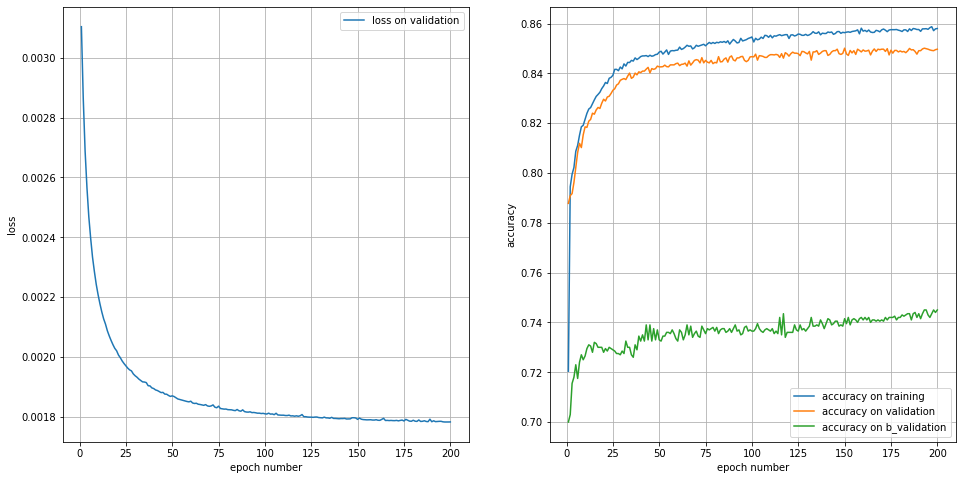

In [28]:
plt.figure(figsize=(16, 8))

plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val)) + 1, losses_val, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train)) + 1, accur_train, label='accuracy on training')
plt.plot(np.arange(len(accur_val)) + 1, accur_val, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b)) + 1, accur_val_b, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

In [ ]:
print('Accuracy on train after 200 epochs:',round(accur_train[-1],3))
print('Accuracy on validation after 200 epochs:',round(accur_val[-1],3))
print('Accuracy on b_validation after 200 epochs:',round(accur_val_b[-1],3))

Accuracy on train after 200 epochs: 0.857
Accuracy on validation after 200 epochs: 0.849
Accuracy on b_validation after 200 epochs: 0.742


```
Firstly, I took the number of epochs equal to 400 and found out that 
my algorithm converges after 200 epochs (the accuracy on b_validation 
stopped growing). After 200 epochs accuracy on train is equal to 0.857, 
on validation it is equal to 0.849 and on b_validation it is equal to 0.742.
For these set of parameters I don't observe under or overfitting.

```

Try to set different learning rates.

*Question: Plot different training curves for different learning rate parameters. Which conclusions could be made on this?*

In [ ]:
N_EPOCHS = 200
LEARNING_RATE = 0.00001
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-5

model = LogisticRegression(NUM_LABELS, VOCAB_SIZE)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train_00001, losses_train_00001, accur_val_00001, losses_val_00001, accur_val_b_00001, losses_val_b_00001 = train(model=model, train_dataloader=train_dataloader, dev_dataloader=dev_dataloader,
                                                                                                      dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, loss_function= loss_function, 
                                                                                                      N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

In [ ]:
N_EPOCHS = 200
LEARNING_RATE = 0.0001
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-5

model = LogisticRegression(NUM_LABELS, VOCAB_SIZE)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train_0001, losses_train_0001, accur_val_0001, losses_val_0001, accur_val_b_0001, losses_val_b_0001 = train(model=model, train_dataloader=train_dataloader, dev_dataloader=dev_dataloader,
                                                                                                      dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, loss_function= loss_function, 
                                                                                                      N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

In [ ]:
N_EPOCHS = 200
LEARNING_RATE = 0.01
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-5

model = LogisticRegression(NUM_LABELS, VOCAB_SIZE)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train_01, losses_train_01, accur_val_01, losses_val_01, accur_val_b_01, losses_val_b_01 = train(model=model, train_dataloader=train_dataloader, dev_dataloader=dev_dataloader,
                                                                                                      dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, loss_function= loss_function, 
                                                                                                      N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

In [ ]:
N_EPOCHS = 200
LEARNING_RATE = 0.1
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-5

model = LogisticRegression(NUM_LABELS, VOCAB_SIZE)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train_1, losses_train_1, accur_val_1, losses_val_1, accur_val_b_1, losses_val_b_1 = train(model=model, train_dataloader=train_dataloader, dev_dataloader=dev_dataloader,
                                                                                                      dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, loss_function= loss_function, 
                                                                                                      N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

Loss and accuracy for model with lr = 0.00001


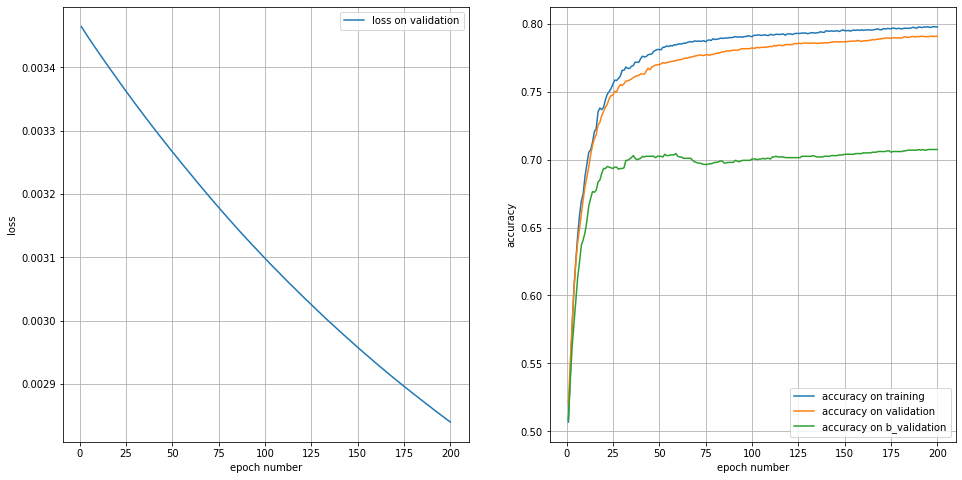

In [ ]:
print('Loss and accuracy for model with lr = 0.00001')
plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val_00001)) + 1, losses_val_00001, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train_00001)) + 1, accur_train_00001, label='accuracy on training')
plt.plot(np.arange(len(accur_val_00001)) + 1, accur_val_00001, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b_00001)) + 1, accur_val_b_00001, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

Loss and accuracy for model with lr = 0.0001


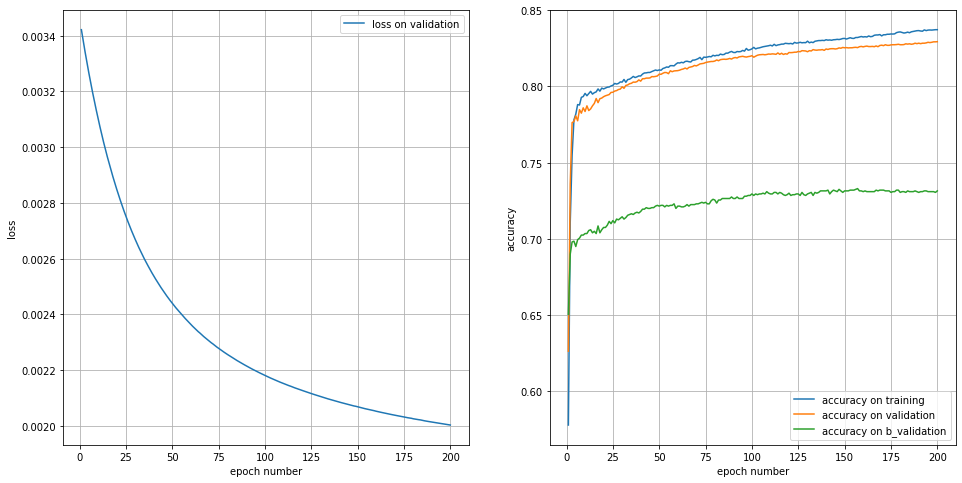

In [ ]:
print('Loss and accuracy for model with lr = 0.0001')
plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val_0001)) + 1, losses_val_0001, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train_0001)) + 1, accur_train_0001, label='accuracy on training')
plt.plot(np.arange(len(accur_val_0001)) + 1, accur_val_0001, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b_0001)) + 1, accur_val_b_0001, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

Loss and accuracy for model with lr = 0.001


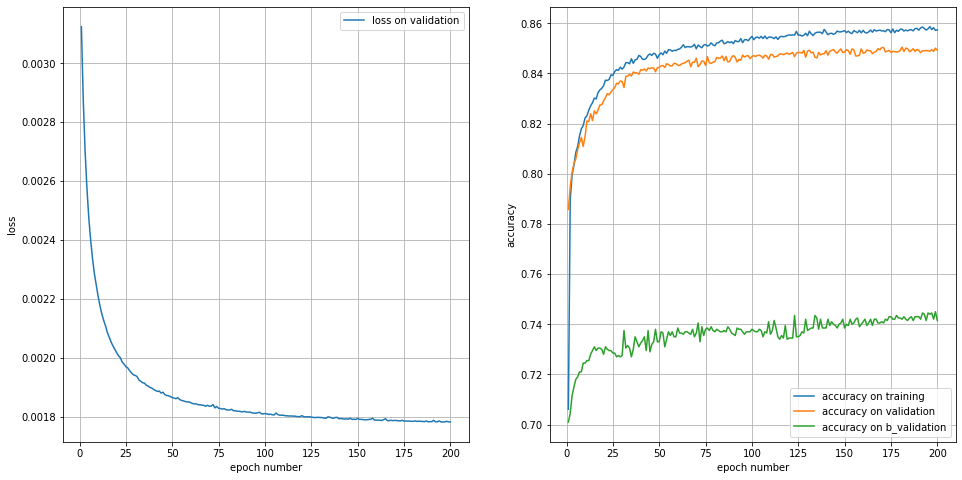

In [ ]:
print('Loss and accuracy for model with lr = 0.001')
plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val)) + 1, losses_val, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train)) + 1, accur_train, label='accuracy on training')
plt.plot(np.arange(len(accur_val)) + 1, accur_val, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b)) + 1, accur_val_b, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

Loss and accuracy for model with lr = 0.01


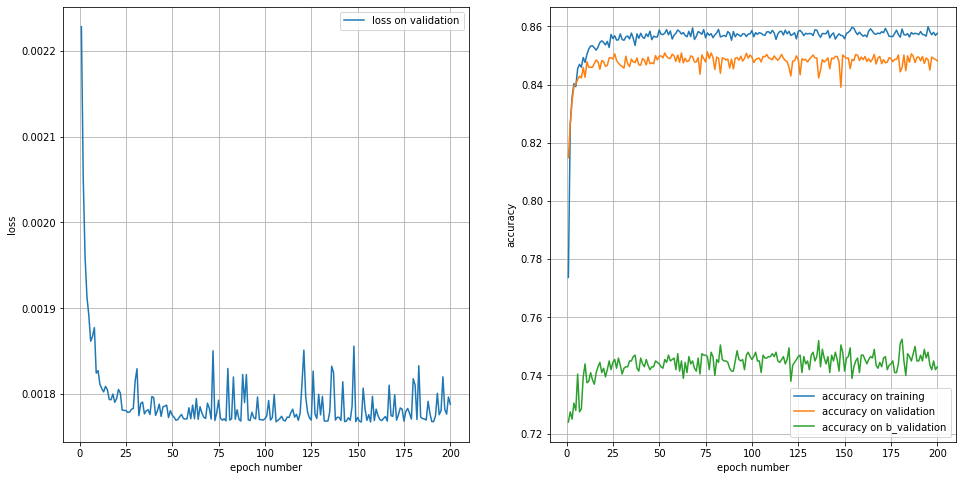

In [ ]:
print('Loss and accuracy for model with lr = 0.01')
plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val_01)) + 1, losses_val_01, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train_01)) + 1, accur_train_01, label='accuracy on training')
plt.plot(np.arange(len(accur_val_01)) + 1, accur_val_01, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b_01)) + 1, accur_val_b_01, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

Loss and accuracy for model with lr = 0.1


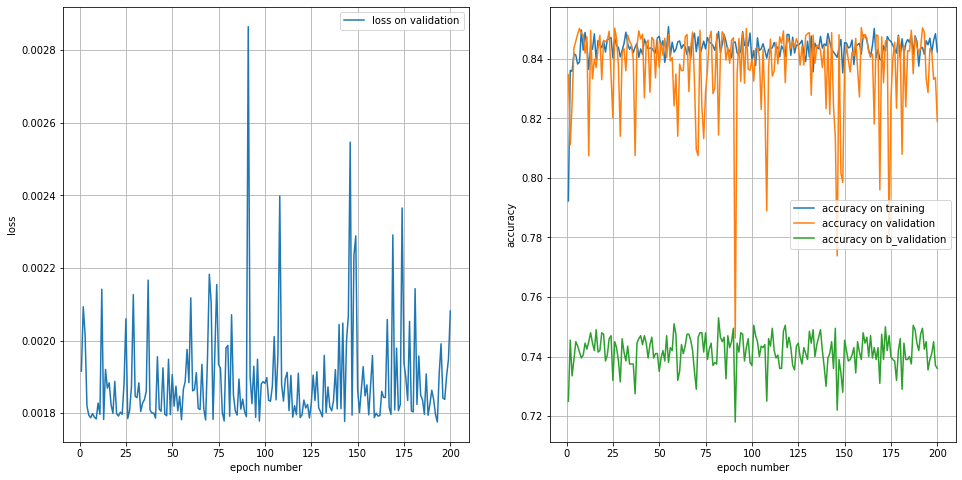

In [ ]:
print('Loss and accuracy for model with lr = 0.1')
plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val_1)) + 1, losses_val_1, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train_1)) + 1, accur_train_1, label='accuracy on training')
plt.plot(np.arange(len(accur_val_1)) + 1, accur_val_1, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b_1)) + 1, accur_val_b_1, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

```
In the case when learning rate is too high (lr=0.1 or lr=0.01) we can see 
undesirable divergent behavior in loss and accuracy functions. It is hard for 
the model to converge and find the optimum weights. 

On the other hand, when the learning rate is too low (lr = 0.00001 or lr = 0.0001), 
training procedure progresses very slowly as we are making very tiny updates to 
the weights in the network. As we can see on the plots, in this case we didn't 
even managed to converge to the optimum.

```

#### 2.1.3 Regularization 

For $\alpha$ coefficient of $L_2$ regularizer we used a random value. Wrong/inappropriate $\alpha$ causes underfitting ($\alpha$ is too large) or overfitting ($\alpha$ is too small). Choose the appropriate $\alpha$ that helps to perform better on validation set. Be careful: $\alpha$ changes the objective fiunction, so it is possible that the learning rate and the number of epochs should be changed too. Use plots to choose the appropriate values!

_Question: plot training curves for several $\alpha$ values. What conclusions could be made? How many epochs and which learning rate do you need until it converges? How long does it take to train and to label test data?_

In [ ]:
N_EPOCHS = 200
LEARNING_RATE = 0.001
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-6

model = LogisticRegression(NUM_LABELS, VOCAB_SIZE)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train6, losses_train6, accur_val6, losses_val6, accur_val_b6, losses_val_b6 = train(model=model, train_dataloader=train_dataloader, 
                                                                                    dev_dataloader=dev_dataloader,dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, 
                                                                                    loss_function= loss_function, N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

In [ ]:
N_EPOCHS = 200
LEARNING_RATE = 0.001
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-7

model = LogisticRegression(NUM_LABELS, VOCAB_SIZE)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train7, losses_train7, accur_val7, losses_val7, accur_val_b7, losses_val_b7 = train(model=model, train_dataloader=train_dataloader, 
                                                                                    dev_dataloader=dev_dataloader,dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, 
                                                                                    loss_function= loss_function, N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

In [ ]:
N_EPOCHS = 200
LEARNING_RATE = 0.001
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-4

model = LogisticRegression(NUM_LABELS, VOCAB_SIZE)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train4, losses_train4, accur_val4, losses_val4, accur_val_b4, losses_val_b4 = train(model=model, train_dataloader=train_dataloader, 
                                                                                    dev_dataloader=dev_dataloader,dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, 
                                                                                    loss_function= loss_function, N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

Loss and accuracy for model with weight_decay = 1e-4


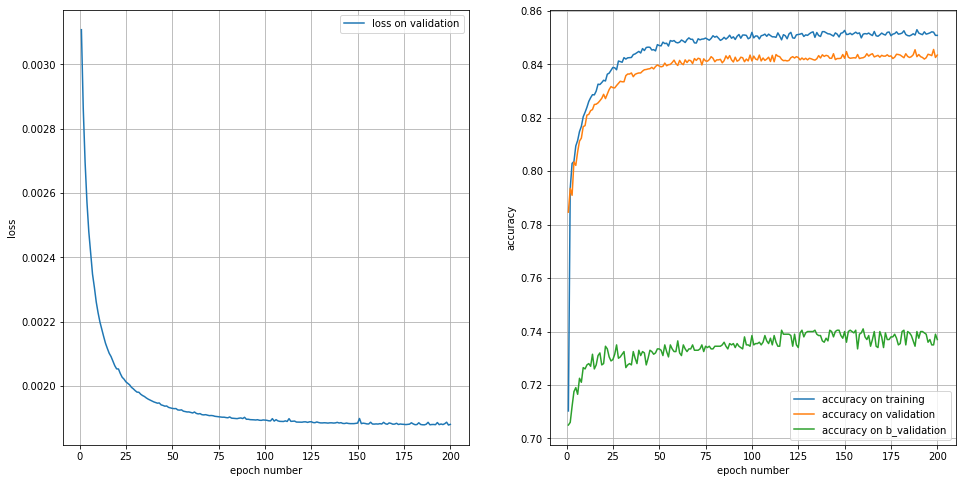

In [ ]:
print('Loss and accuracy for model with weight_decay = 1e-4')
plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val4)) + 1, losses_val4, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train4)) + 1, accur_train4, label='accuracy on training')
plt.plot(np.arange(len(accur_val4)) + 1, accur_val4, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b4)) + 1, accur_val_b4, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

Loss and accuracy for model with weight_decay = 1e-5


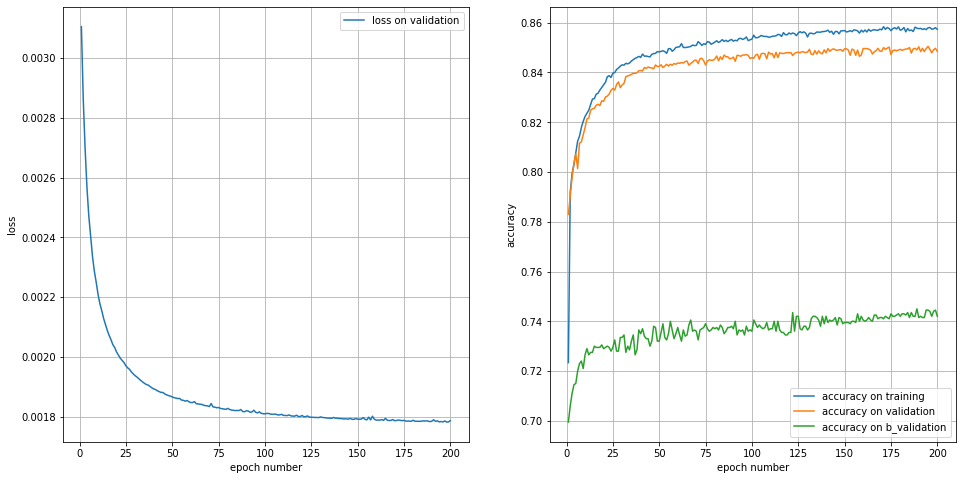

In [ ]:
print('Loss and accuracy for model with weight_decay = 1e-5')
plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val)) + 1, losses_val, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train)) + 1, accur_train, label='accuracy on training')
plt.plot(np.arange(len(accur_val)) + 1, accur_val, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b)) + 1, accur_val_b, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

Loss and accuracy for model with weight_decay = 1e-6


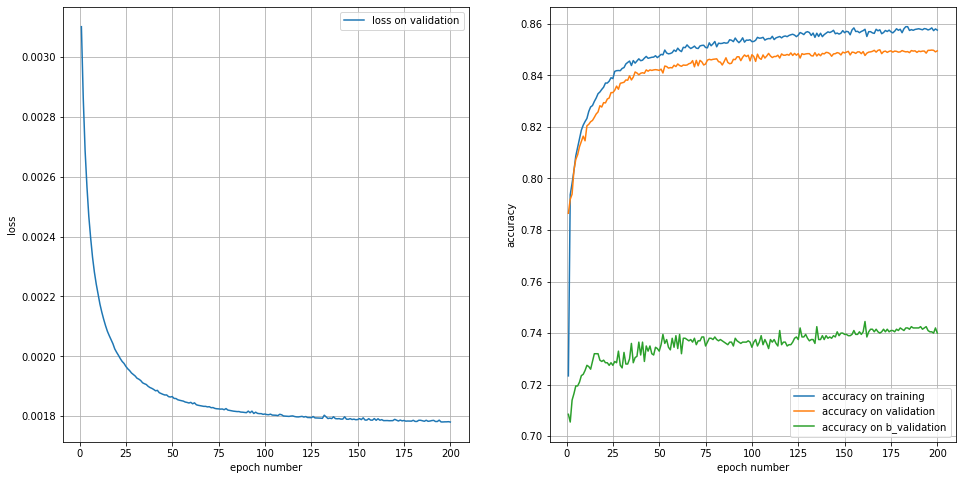

In [ ]:
print('Loss and accuracy for model with weight_decay = 1e-6')
plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val6)) + 1, losses_val6, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train6)) + 1, accur_train6, label='accuracy on training')
plt.plot(np.arange(len(accur_val6)) + 1, accur_val6, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b6)) + 1, accur_val_b6, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

Loss and accuracy for model with weight_decay = 1e-7


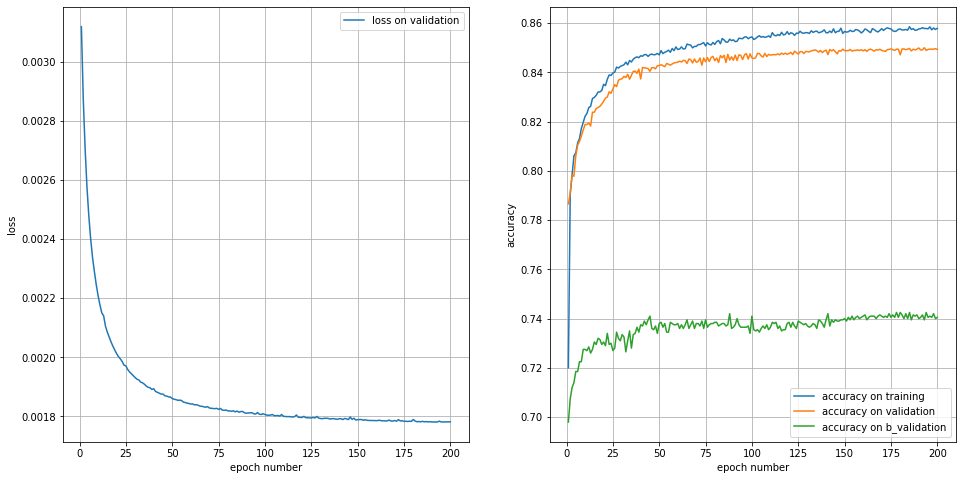

In [ ]:
print('Loss and accuracy for model with weight_decay = 1e-7')
plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val7)) + 1, losses_val7, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train7)) + 1, accur_train7, label='accuracy on training')
plt.plot(np.arange(len(accur_val7)) + 1, accur_val7, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b7)) + 1, accur_val_b7, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

```

As we can see, when weight_decay = 1e-7 the model overfits (the loss on
 validation decreases, the accuracy on test doesn't increase). The similar 
 thing happens when weight_decay = 1e-6.

When weight_decay = 1e-4 our model underfits.

The weight_decay = 1e-5 is the best variant. There is no need to take more 
epochs due to the fact that the model becomes to overfit. Also, as it was 
discussed earlier, the best learning rate is equal to 0.001.

```

### 2.2 Feed-forward Neural Network



The goal of this section to implement using **pytorch** a text categorization model using Feed-forward Neural Network. Following the steps below, you can complete corresponding parts in your ``classifier_ffnn.py`` script and apply the code for sentiment classification task.

1. Repeat the steps 2.1.1 - 2.1.2 from the Logistic regression subsection.

2. Implement Feed-forward Neural Network with **one** hidden layer using **pytorсh**.

In [29]:
class FFNN(nn.Module):
    def __init__(self, vocab_size, num_classes, hidden_layer_size=10):
        super().__init__()
        self.hidden_layer = nn.Linear(vocab_size, hidden_layer_size)
        self.relu = torch.nn.ReLU()
        self.output_layer = nn.Linear(hidden_layer_size, num_classes)
    
    def forward(self, features):
        intermid = self.hidden_layer(features)
        intermid = self.relu(intermid)
        intermid = self.output_layer(intermid)
        output = F.log_softmax(intermid, dim=1)
        return output

3. Similarly to 2.1.10 and 2.1.11, do the finetuning for the learning rate and $\alpha$ coefficient of $L_2$ regularizer hyperparameters on validation set.


_Question: plot learning curves for different $\alpha$. What is the optimal value of $\alpha$? of learning rate? How many epoch does it take to converge?_


In [30]:
N_EPOCHS = 200
LEARNING_RATE = 0.001
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-5

model = FFNN(VOCAB_SIZE, NUM_LABELS)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train, losses_train, accur_val, losses_val, accur_val_b, losses_val_b= train(model=model, train_dataloader=train_dataloader, 
                                                                                    dev_dataloader=dev_dataloader,dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, 
                                                                                    loss_function= loss_function, N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

Loss and accuracy for model with weight_decay = 1e-5, lr = 0.001 and #epochs = 200


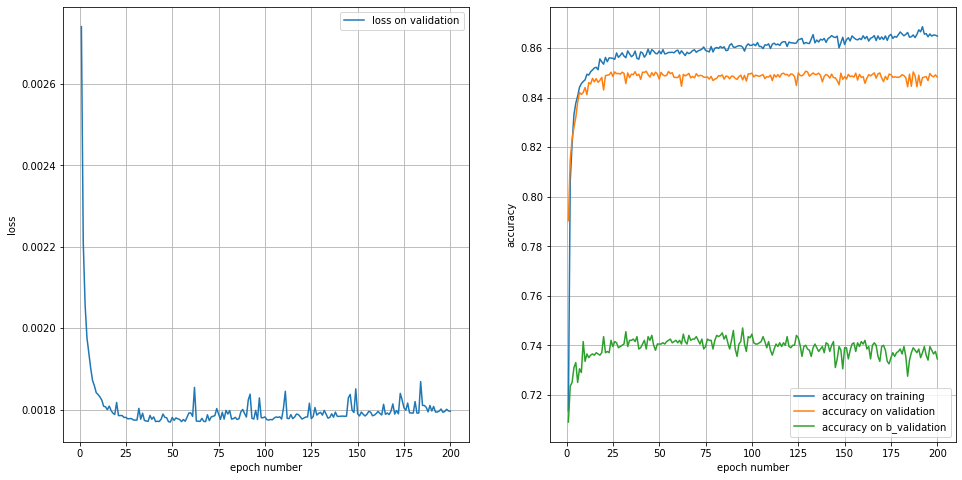

In [31]:
print('Loss and accuracy for model with weight_decay = 1e-5, lr = 0.001 and #epochs = 200')
plt.figure(figsize=(16, 8))

plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val)) + 1, losses_val, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train)) + 1, accur_train, label='accuracy on training')
plt.plot(np.arange(len(accur_val)) + 1, accur_val, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b)) + 1, accur_val_b, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

In [ ]:
N_EPOCHS = 125
LEARNING_RATE = 0.001
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-5

model = FFNN(VOCAB_SIZE, NUM_LABELS)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train, losses_train, accur_val, losses_val, accur_val_b, losses_val_b= train(model=model, train_dataloader=train_dataloader, 
                                                                                    dev_dataloader=dev_dataloader,dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, 
                                                                                    loss_function= loss_function, N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

Loss and accuracy for model with weight_decay = 1e-5, lr = 0.001 and #epochs = 125
Accuracy on train after 125 epochs: 0.861
Accuracy on validation after 125 epochs: 0.85
Accuracy on b_validation after 125 epochs: 0.747


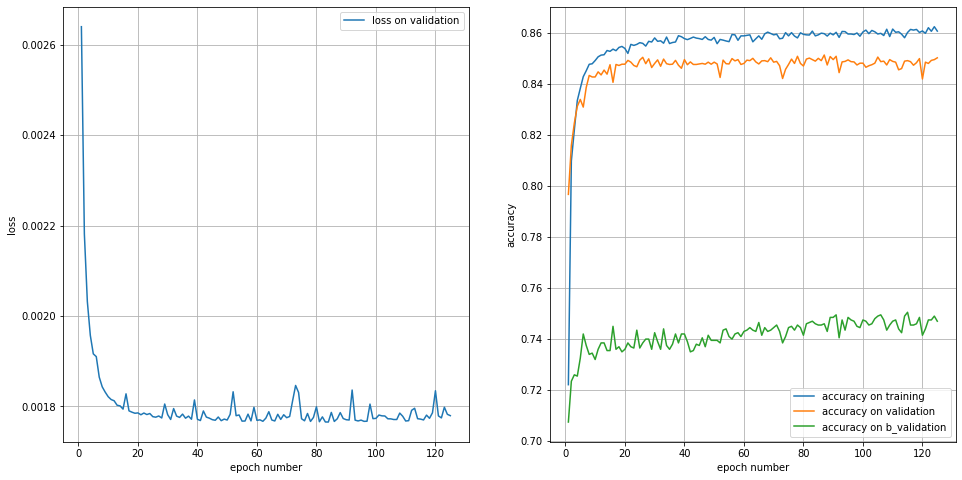

In [ ]:
print('Loss and accuracy for model with weight_decay = 1e-5, lr = 0.001 and #epochs = 125')
print('Accuracy on train after 125 epochs:',round(accur_train[-1],3))
print('Accuracy on validation after 125 epochs:',round(accur_val[-1],3))
print('Accuracy on b_validation after 125 epochs:',round(accur_val_b[-1],3))

plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val)) + 1, losses_val, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train)) + 1, accur_train, label='accuracy on training')
plt.plot(np.arange(len(accur_val)) + 1, accur_val, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b)) + 1, accur_val_b, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

In [ ]:
N_EPOCHS = 125
LEARNING_RATE = 0.01
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-5

model = FFNN(VOCAB_SIZE, NUM_LABELS)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train_01, losses_train_01, accur_val_01, losses_val_01, accur_val_b_01, losses_val_b_01= train(model=model, train_dataloader=train_dataloader, 
                                                                                    dev_dataloader=dev_dataloader,dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, 
                                                                                    loss_function= loss_function, N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

Loss and accuracy for model with weight_decay = 1e-5, lr = 0.01 and #epochs = 125
Accuracy on train after 125 epochs: 0.882
Accuracy on validation after 125 epochs: 0.836
Accuracy on b_validation after 125 epochs: 0.727


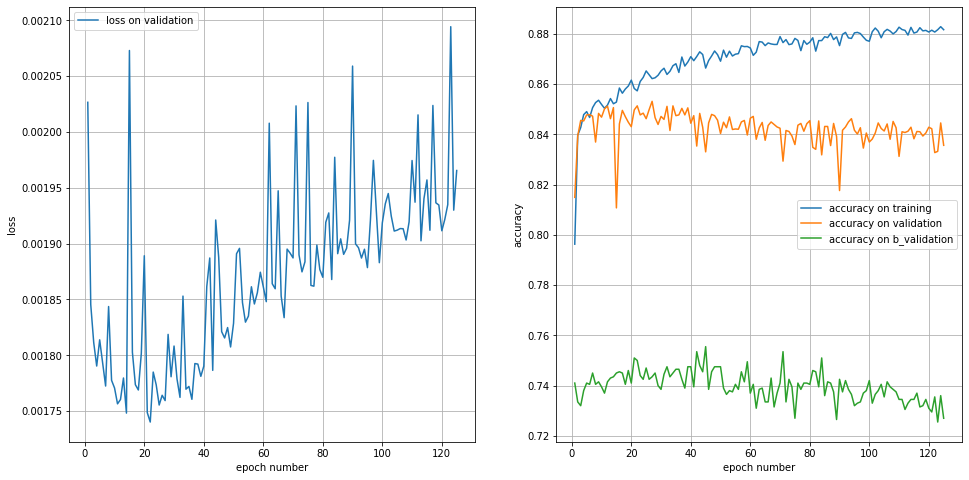

In [ ]:
print('Loss and accuracy for model with weight_decay = 1e-5, lr = 0.01 and #epochs = 125')
print('Accuracy on train after 125 epochs:',round(accur_train_01[-1],3))
print('Accuracy on validation after 125 epochs:',round(accur_val_01[-1],3))
print('Accuracy on b_validation after 125 epochs:',round(accur_val_b_01[-1],3))

plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val_01)) + 1, losses_val_01, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train_01)) + 1, accur_train_01, label='accuracy on training')
plt.plot(np.arange(len(accur_val_01)) + 1, accur_val_01, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b_01)) + 1, accur_val_b_01, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

In [ ]:
N_EPOCHS = 125
LEARNING_RATE = 0.0001
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-5

model = FFNN(VOCAB_SIZE, NUM_LABELS)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train_0001, losses_train_0001, accur_val_0001, losses_val_0001, accur_val_b_0001, losses_val_b_0001= train(model=model, train_dataloader=train_dataloader, 
                                                                                    dev_dataloader=dev_dataloader,dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, 
                                                                                    loss_function= loss_function, N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

Loss and accuracy for model with weight_decay = 1e-5, lr = 0.0001 and #epochs = 125
Accuracy on train after 125 epochs: 0.854
Accuracy on validation after 125 epochs: 0.847
Accuracy on b_validation after 125 epochs: 0.738


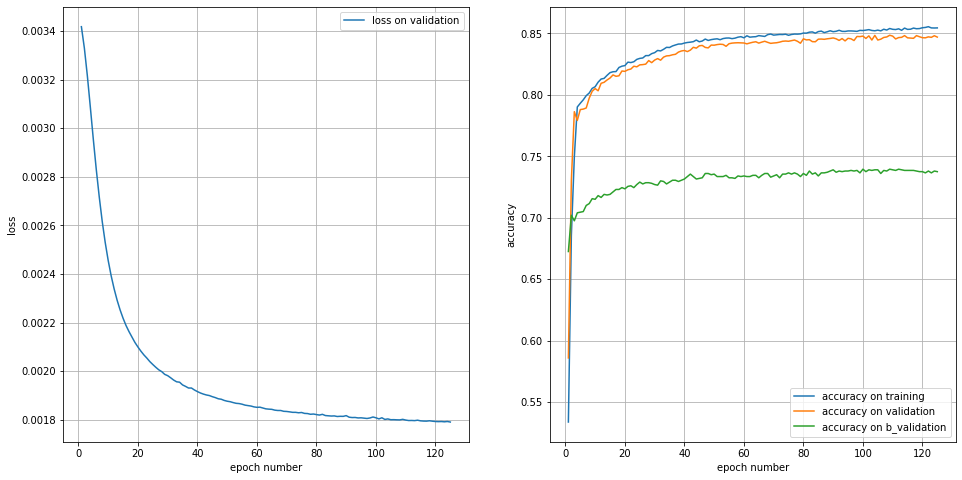

In [ ]:
print('Loss and accuracy for model with weight_decay = 1e-5, lr = 0.0001 and #epochs = 125')
print('Accuracy on train after 125 epochs:',round(accur_train_0001[-1],3))
print('Accuracy on validation after 125 epochs:',round(accur_val_0001[-1],3))
print('Accuracy on b_validation after 125 epochs:',round(accur_val_b_0001[-1],3))

plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val_0001)) + 1, losses_val_0001, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train_0001)) + 1, accur_train_0001, label='accuracy on training')
plt.plot(np.arange(len(accur_val_0001)) + 1, accur_val_0001, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b_0001)) + 1, accur_val_b_0001, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

In [ ]:
N_EPOCHS = 125
LEARNING_RATE = 0.001
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-4

model = FFNN(VOCAB_SIZE, NUM_LABELS)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train4, losses_train4, accur_val4, losses_val4, accur_val_b4, losses_val_b4= train(model=model, train_dataloader=train_dataloader, 
                                                                                    dev_dataloader=dev_dataloader,dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, 
                                                                                    loss_function= loss_function, N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

Loss and accuracy for model with weight_decay = 1e-4, lr = 0.001 and #epochs = 125
Accuracy on train after 125 epochs: 0.862
Accuracy on validation after 125 epochs: 0.848
Accuracy on b_validation after 125 epochs: 0.741


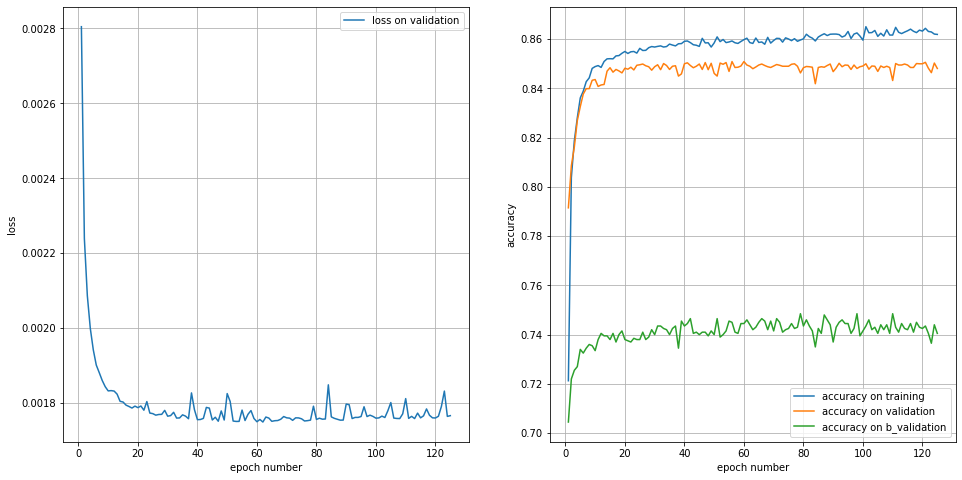

In [ ]:
print('Loss and accuracy for model with weight_decay = 1e-4, lr = 0.001 and #epochs = 125')
print('Accuracy on train after 125 epochs:',round(accur_train4[-1],3))
print('Accuracy on validation after 125 epochs:',round(accur_val4[-1],3))
print('Accuracy on b_validation after 125 epochs:',round(accur_val_b4[-1],3))

plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val4)) + 1, losses_val4, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train4)) + 1, accur_train4, label='accuracy on training')
plt.plot(np.arange(len(accur_val4)) + 1, accur_val4, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b4)) + 1, accur_val_b4, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

In [ ]:
N_EPOCHS = 125
LEARNING_RATE = 0.001
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-6

model = FFNN(VOCAB_SIZE, NUM_LABELS)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train6, losses_train6, accur_val6, losses_val6, accur_val_b6, losses_val_b6= train(model=model, train_dataloader=train_dataloader, 
                                                                                    dev_dataloader=dev_dataloader,dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, 
                                                                                    loss_function= loss_function, N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

Loss and accuracy for model with weight_decay = 1e-6, lr = 0.001 and #epochs = 125
Accuracy on train after 125 epochs: 0.869
Accuracy on validation after 125 epochs: 0.85
Accuracy on b_validation after 125 epochs: 0.743


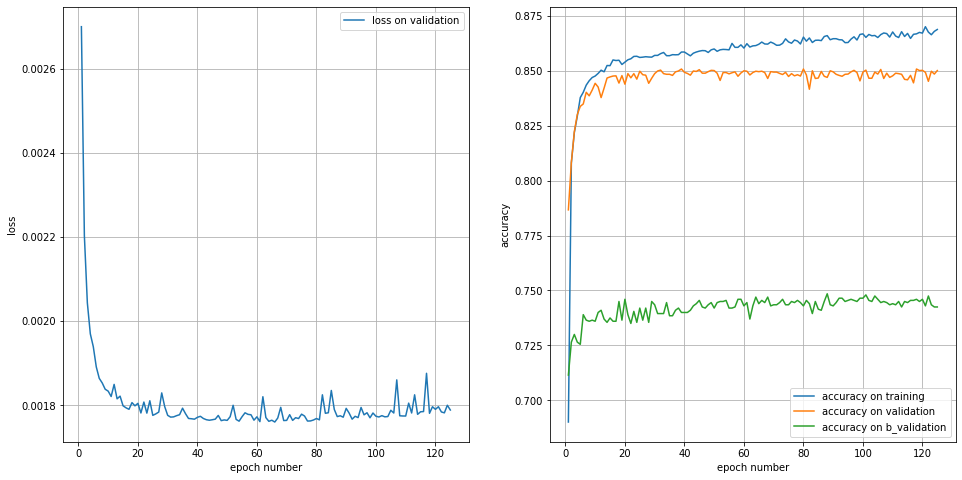

In [ ]:
print('Loss and accuracy for model with weight_decay = 1e-6, lr = 0.001 and #epochs = 125')
print('Accuracy on train after 125 epochs:',round(accur_train6[-1],3))
print('Accuracy on validation after 125 epochs:',round(accur_val6[-1],3))
print('Accuracy on b_validation after 125 epochs:',round(accur_val_b6[-1],3))

plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val6)) + 1, losses_val6, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train6)) + 1, accur_train6, label='accuracy on training')
plt.plot(np.arange(len(accur_val6)) + 1, accur_val6, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b6)) + 1, accur_val_b6, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

```

As we can see on the first plot, when the number of epochs is equal to 200 our 
FFNN model overfits, therefore, the number of epochs should be decreased. 

In the case when learning rate is too high (lr=0.01) we can see 
undesirable divergent behavior in loss and accuracy functions. It is hard for 
the model to converge and find the optimum weights. 
 
On the other hand, when the learning rate is too low (lr = 0.0001), 
training procedure progresses very slowly as we are making very tiny updates to 
the weights in the network. As we can see on the plots, in this case we didn't 
even managed to converge to the optimum.

As we can see, the results are similar to the one we obtained with Logistic Regression.

Changing weight decay also doesn't help to improve accuracy on test.

```

Using $\alpha$ and learning rate from 2.2.3 train the classifier on the whole train set. 

In [ ]:
X = X_train + X_dev
train_dataloader = DataLoader(X, batch_size=BATCH_SIZE, shuffle=True, num_workers=1)

In [ ]:
N_EPOCHS = 125
LEARNING_RATE = 0.001
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-5
model = FFNN(VOCAB_SIZE, NUM_LABELS)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()

accur_train = []
losses_train = []

accur_val_b = []
losses_val_b = []

for epoch in range(N_EPOCHS):
    a = [] #accuracy on train for each epoch
    l = [] #loss on train for each epoch
    model.train(True)
    for features, labels in train_dataloader: 
        model.zero_grad()
        log_probs = model(features) #probability predictions on train
        loss = loss_function(log_probs, labels)
        y_pred = log_probs.max(1)[1].data 
      
        a.append(np.mean((labels.cpu() == y_pred.cpu()).numpy()))
        l.append(loss.data.cpu().numpy())
        
        loss.backward()
        optimizer.step()

    accur_train.append(np.mean(a))
    losses_train.append(np.mean(l))

    val_b_loss, val_b_acc = test(dev_b_dataloader, model, batch_size=200)


    accur_val_b.append(val_b_acc)
    losses_val_b.append(val_b_loss)

Loss and accuracy for model with weight_decay = 1e-5, lr = 0.001 and #epochs = 125
Accuracy on train after 125 epochs: 0.859
Accuracy on b_validation after 125 epochs: 0.747


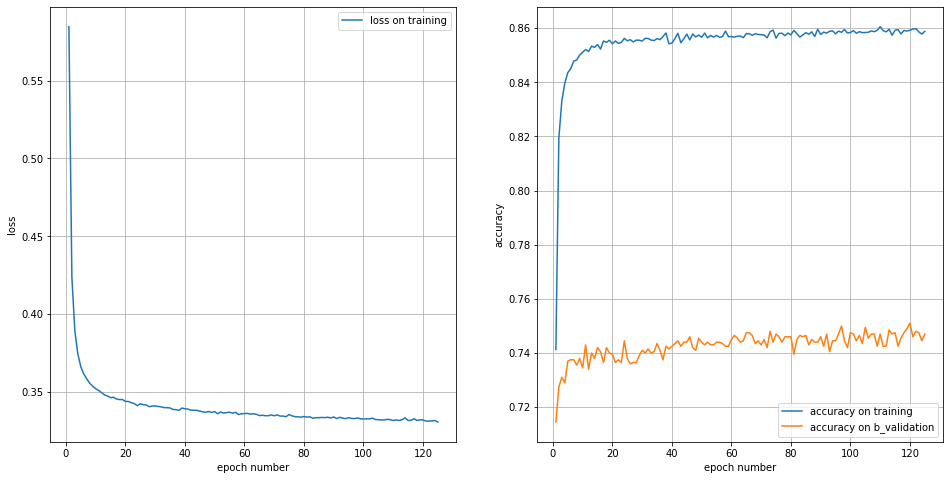

In [ ]:
print('Loss and accuracy for model with weight_decay = 1e-5, lr = 0.001 and #epochs = 125')
print('Accuracy on train after 125 epochs:',round(accur_train[-1],3))
print('Accuracy on b_validation after 125 epochs:',round(accur_val_b[-1],3))
plt.figure(figsize=(16, 8))

plt.subplot(121)
plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train)) + 1, accur_train, label='accuracy on training')
plt.plot(np.arange(len(accur_val_b)) + 1, accur_val_b, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

### 2.3 Recurrent Neural Networks

The goal of this section to implement using **pytorch** a text categorization model using Recurrent Neural Networks. Following the steps below, you can complete corresponding parts in your ``classifier_rnn.py`` script and apply the code for sentiment classification task. Choose between all proposed configuration that one that gives you the best validation score and implement it for the final submission.

#### 2.3.1 Use LSTM and word embeddings for text classification 


Implement a text classifier based on Bi-LSTM network. Use hidden state(s) to represent an input text document.  If you use ``torch`` use the ``torch.nn.Embedding`` to load pre-trained word embeddings. Use the [GloVe](http://nlp.stanford.edu/data/wordvecs/glove.6B.zip) embeddings in the input layer of your network.

#### 1) Load the embeddings and transform the vocabulary so that it includes only words that occur in the data and for which embeddings exist:

In [ ]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
#!unzip -x glove.6B.zip

In [32]:
# load the embeddings (taken from the seminar)
def load_embeddings(emb_path, vocab):
    clf_embeddings = {}
    emb_vocab = set()
    for line in open(emb_path):
        line = line.strip('\n').split()
        word, emb = line[0], line[1:]
        emb = [float(e) for e in emb]
        if word in vocab:
            clf_embeddings[word] = emb
    for w in vocab:
        if w in clf_embeddings:
            emb_vocab.add(w)
    word2idx = {w: idx for (idx, w) in enumerate(emb_vocab)}
    max_val = max(word2idx.values())
    
    word2idx['UNK'] = max_val + 1
    word2idx['EOS'] = max_val + 2
    emb_dim = len(list(clf_embeddings.values())[0])
    clf_embeddings['UNK'] = [0.0 for i in range(emb_dim)]
    clf_embeddings['EOS'] = [0.0 for i in range(emb_dim)]
    
    embeddings = [[] for i in range(len(word2idx))]
    for w in word2idx:
        embeddings[word2idx[w]] = clf_embeddings[w]
    embeddings = torch.Tensor(embeddings)
    return embeddings, word2idx

In [33]:
vocab = set(unique_vords)
embeddings, vocab = load_embeddings('glove.6B.300d.txt', vocab)

In [34]:
def to_matrix(lines, vocab, max_len=None, dtype='int32'):
    """Casts a list of lines into a matrix"""
    pad = vocab['EOS']
    max_len = max_len or max(map(len, lines))
    lines_ix = np.zeros([len(lines), max_len], dtype) + pad
    for i in range(len(lines)):
        line_ix = [vocab.get(l, vocab['UNK']) for l in lines[i]]
        lines_ix[i, :len(line_ix)] = line_ix
    lines_ix = torch.LongTensor(lines_ix)
    return lines_ix

In [35]:
def generate_data(train_tok,vocab,label_enc=None,with_label=True):
    data = []
    if with_label:
        for t, l in zip(train_tok,label_enc):
            t = to_matrix([t], vocab)
            l = torch.Tensor([l])
            data.append((t, l))
    else:
        for t in train_tok:
            t = to_matrix([t], vocab)
            data.append(t)
    return data

In [36]:
encoder = OneHotEncoder(categories=[range(2)], sparse=False)
y_enc_train = encoder.fit_transform(train_data['label'].values.reshape(-1, 1))
y_enc_dev = encoder.fit_transform(dev_data['label'].values.reshape(-1, 1))
y_enc_dev_b = encoder.fit_transform(dev_b_data['label'].values.reshape(-1, 1))

In [37]:
train_x = generate_data(train_tok=train_data['preprocessed text'].values,label_enc=y_enc_train, vocab=vocab)
dev_x = generate_data(train_tok=dev_data['preprocessed text'].values,label_enc=y_enc_dev, vocab=vocab)
dev_b_x = generate_data(train_tok=dev_b_data['preprocessed text'].values,label_enc=y_enc_dev_b, vocab=vocab)

#### 2) Bi-LSTM text categorization model with pre-trained GloVe word embeddings:

In [38]:
class BiLSTM(nn.Module):
    def __init__(self, embeddings, hidden_dim=128, lstm_layer=1, output=2):
        
        super(BiLSTM, self).__init__()
        self.hidden_dim = hidden_dim
        
        # load pre-trained embeddings
        self.embedding = nn.Embedding.from_pretrained(embeddings)
        # embeddings are not fine-tuned
        self.embedding.weight.requires_grad = False
        
        # RNN layer with LSTM cells
        # OR self.lstm = NaiveLSTM(input_sz = self.embedding.embedding_dim, hidden_sz = hidden_dim)
        self.lstm = nn.LSTM(input_size=self.embedding.embedding_dim,
                            hidden_size=hidden_dim,
                            num_layers=lstm_layer, 
                            bidirectional=True)
        # dense layer
        self.output = nn.Linear(hidden_dim*2, output)
    
    def forward(self, sents):
        x = self.embedding(sents)
        
        # the original dimensions of torch LSTM's output are: (seq_len, batch, num_directions * hidden_size)
        lstm_out, _ = self.lstm(x)
        
        # reshape to get the tensor of dimensions (seq_len, batch, num_directions, hidden_size)
        lstm_out = lstm_out.view(x.shape[0], -1, 2, self.hidden_dim)#.squeeze(1)
        
        # lstm_out[:, :, 0, :] -- output of the forward LSTM
        # lstm_out[:, :, 1, :] -- output of the backward LSTM
        # we take the last hidden state of the forward LSTM and the first hidden state of the backward LSTM
        dense_input = torch.cat((lstm_out[-1, :, 0, :], lstm_out[0, :, 1, :]), dim=1)
        
        y = self.output(dense_input).view([1, 2])
        return y

In [39]:
def binary_accuracy(preds, y):
    # y is either [0, 1] or [1, 0]
    # get the class (0 or 1)
    y = torch.argmax(y, dim=1)
    
    # get the predicted class
    preds = torch.argmax(torch.sigmoid(preds), dim=1)
    
    correct = (preds == y).float() 
    acc = correct.sum() / len(correct)
    return acc

In [40]:
def train(model, train_data, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    # set the model to the training mode
    model.train(mode=True)
    
    for t, l in train_data:
        # reshape the data to n_words x batch_size (here batch_size=1)
        t = t.view((-1, 1))
        # transfer the data to GPU to make it accessible for the model and the loss
        t = t.to(device)
        l = l.to(device)
        
        # set all gradients to zero
        optimizer.zero_grad()
        
        # forward pass of training
        # compute predictions with current parameters
        predictions = model(t)
        # compute the loss
        loss = criterion(predictions, l)
        # compute the accuracy (this is only for report)
        acc = binary_accuracy(predictions, l)
        
        # backward pass (fully handled by pytorch)
        loss.backward()
        # update all parameters according to their gradients
        optimizer.step()
        
        # data for report
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(train_data), epoch_acc / len(train_data)

In [41]:
def evaluate(model, test_data, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for t, l in test_data:
            t = t.view((-1, 1))
            t = t.to(device)
            l = l.to(device)
            predictions = model(t)
            
            loss = criterion(predictions, l)
            acc = binary_accuracy(predictions, l)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(test_data), epoch_acc / len(test_data)

In [44]:
#Initialise the model, optimiser, and loss:
hidden_dim = 128
layers = 1
model = BiLSTM(embeddings, hidden_dim, lstm_layer=layers)
optimizer = optim.SGD(model.parameters(), lr=1e-3)
criterion = nn.BCEWithLogitsLoss()

#Transfer the model and loss to GPU:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)

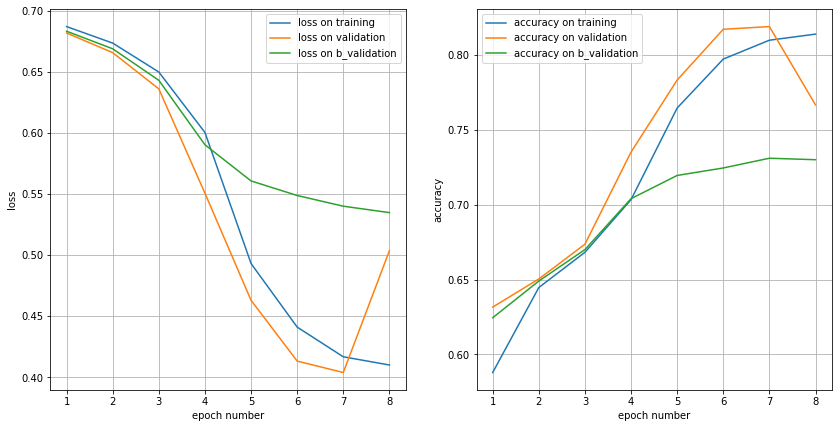

Epoch: 08s
	Train Loss: 0.410 | Train Acc: 81.39%
	 Val. Loss: 0.504 |  Val. Acc: 76.66%
	 Test Loss: 0.535 |  Test Acc: 73.00%


In [45]:
N_EPOCHS = 8

best_valid_loss = float('inf')

train_loss_history = []
valid_loss_history = []

train_acc_history = []
valid_acc_history = []

valid_loss_history_b = []
valid_acc_history_b = []

for epoch in range(N_EPOCHS):

    
    train_loss, train_acc = train(model, train_x, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, dev_x, criterion)
    valid_loss_b, valid_acc_b = evaluate(model, dev_b_x, criterion)
    
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)
    valid_loss_history.append(valid_loss)
    valid_acc_history.append(valid_acc)
    valid_loss_history_b.append(valid_loss_b)
    valid_acc_history_b.append(valid_acc_b)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'bilstm-model.pt')

    clear_output(True)
    plt.figure(figsize=(14, 7))
    plt.subplot(121)
    plt.plot(np.arange(len(train_loss_history)) + 1, train_loss_history, label='loss on training')
    plt.plot(np.arange(len(valid_loss_history)) + 1, valid_loss_history, label='loss on validation')
    plt.plot(np.arange(len(valid_loss_history_b)) + 1, valid_loss_history_b, label='loss on b_validation')
    plt.ylabel('loss')
    plt.xlabel('epoch number')
    plt.legend()
    plt.grid()

    plt.subplot(122)
    plt.plot(np.arange(len(train_acc_history)) + 1, train_acc_history, label='accuracy on training')
    plt.plot(np.arange(len(valid_acc_history)) + 1, valid_acc_history, label='accuracy on validation')
    plt.plot(np.arange(len(valid_acc_history_b)) + 1, valid_acc_history_b, label='accuracy on b_validation')
    plt.ylabel('accuracy')
    plt.xlabel('epoch number')
    plt.legend()
    plt.grid()
    plt.show()

    print(f'Epoch: {epoch+1:02}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    print(f'\t Test Loss: {valid_loss_b:.3f} |  Test Acc: {valid_acc_b*100:.2f}%')

#### 2.3.2 Use LSTM and ELMo for text classification 

Use ``allennlp`` and the model ``elmo_2x2048_256_2048cnn_1xhighway_weights`` which is the model used in week5 seminar to build a text classification system. The only difference from the previous point is the use of ELMo contextualized word embeddings. Do not use any additional dependencies or versions of the ELMo model. Make sure that the model is located in the same directory with the classification Python script.

In [ ]:
!pip install allennlp

     |████████████████████████████████| 634kB 6.0MB/s 
     |████████████████████████████████| 2.1MB 9.0MB/s 
     |████████████████████████████████| 1.2MB 22.0MB/s 
     |████████████████████████████████| 266kB 34.7MB/s 
     |████████████████████████████████| 122kB 25.9MB/s 
     |████████████████████████████████| 2.1MB 26.1MB/s 
     |████████████████████████████████| 133kB 52.3MB/s 
     |████████████████████████████████| 3.3MB 51.5MB/s 
     |████████████████████████████████| 901kB 68.5MB/s 
     |████████████████████████████████| 102kB 14.8MB/s 
     |████████████████████████████████| 133kB 55.9MB/s 
     |████████████████████████████████| 163kB 54.5MB/s 
     |████████████████████████████████| 81kB 11.8MB/s 
     |████████████████████████████████| 7.4MB 66.3MB/s 
     |████████████████████████████████| 71kB 12.3MB/s 
  Created wheel for overrides: filename=overrides-3.1.0-cp37-none-any.whl size=10174 sha256=a7d7850f96dd91bbac698a3c5b2c7c81620d7a09cc3fa96211946618966dd2c0
  Store

In [ ]:
from allennlp.modules.elmo import Elmo, batch_to_ids

In [ ]:
elmo_emb = Elmo(options_file='https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway_5.5B/elmo_2x4096_512_2048cnn_2xhighway_5.5B_options.json',
weight_file='https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway_5.5B/elmo_2x4096_512_2048cnn_2xhighway_5.5B_weights.hdf5', num_output_representations = 1, dropout=0.1)

downloading: 100%|##########| 374434792/374434792 [00:12<00:00, 29084166.12B/s]


In [ ]:
class BiLSTM(nn.Module):
    def __init__(self, hidden_dim=128, lstm_layer=1, output=2):
        
        super(BiLSTM, self).__init__()
        self.hidden_dim = hidden_dim
        
        # load pre-trained embeddings
        self.emb = elmo_emb
        # embeddings are not fine-tuned
        # self.embedding.weight.requires_grad = False
        
        # RNN layer with LSTM cells
        # OR self.lstm = NaiveLSTM(input_sz = self.embedding.embedding_dim, hidden_sz = hidden_dim)
        self.lstm = nn.LSTM(input_size=self.emb.get_output_dim(),
                            hidden_size=hidden_dim,
                            num_layers=lstm_layer, 
                            bidirectional=True)
        # dense layer
        self.output = nn.Linear(hidden_dim*2, output)
    
    def forward(self, sents):
        x = self.emb(sents)
        #print (x.shape)
        # the original dimensions of torch LSTM's output are: (seq_len, batch, num_directions * hidden_size)
        x = x['elmo_representations'][0]
        x = x.view(x.shape[1], -1, elmo_emb.get_output_dim()) 
        # We need to change sequence of dimentions from (batch, seq_len, input_size) -> (seq_len, batch, input_size) which is proper to nn.lstm
        lstm_out, _ = self.lstm(x)
        ## print ("lstm_out.shape", lstm_out.shape)
        # reshape to get the tensor of dimensions (seq_len, batch, num_directions, hidden_size)
        lstm_out = lstm_out.view(x.shape[0], -1, 2, self.hidden_dim)#.squeeze(1)
        # lstm_out[:, :, 0, :] -- output of the forward LSTM
        # lstm_out[:, :, 1, :] -- output of the backward LSTM
        # we take the last hidden state of the forward LSTM and the first hidden state of the backward LSTM
        
        dense_input = torch.cat((lstm_out[-1, :, 0, :], lstm_out[0, :, 1, :]), dim=1)
        
        y = self.output(dense_input).view([1, 2])
        return y

In [ ]:
def train(model, train_data, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    # set the model to the training mode
    model.train(mode=True)
    for t, l in tqdm(train_data):
        # reshape the data to n_words x batch_size (here batch_size=1)
        # t = t.view((-1, 1))
        # transfer the data to GPU to make it accessible for the model and the loss
        # t = batch_to_ids(t).to(device)
        t = t.to(device)
        l = l.to(device)
        # set all gradients to zero
        optimizer.zero_grad()
        # forward pass of training
        # compute predictions with current parameters
        ##  print(t.shape)
        predictions = model(t)
        # compute the loss
        loss = criterion(predictions, l)
        ## print(loss.item())
        # compute the accuracy (this is only for report)
        acc = binary_accuracy(predictions, l)
        # backward pass (fully handled by pytorch)
        loss.backward()
        # update all parameters according to their gradients
        optimizer.step()
        
        # data for report
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        #print (acc.item())
        
    return epoch_loss / len(train_data), epoch_acc / len(train_data)

In [ ]:
def evaluate(model, test_data, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for t, l in tqdm(test_data):
            #t = t.view((-1, 1))
            # t = batch_to_ids(t).to(device)
            t = t.to(device)
            l = l.to(device)
            predictions = model(t)
            
            loss = criterion(predictions, l)
            acc = binary_accuracy(predictions, l)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(test_data), epoch_acc / len(test_data)

In [ ]:
# train_x_elmo=[[batch_to_ids(text), torch.Tensor([y])] for (text, y) in zip(train_data['preprocessed text'].values[:1000], train_data['label'].values[:1000])]
# dev_x_elmo=[[batch_to_ids(text), torch.Tensor([y])] for (text, y) in zip(dev_data['preprocessed text'].values[:1000], dev_data['label'].values[:1000])]
# dev_b_x_elmo=[[batch_to_ids(text), torch.Tensor([y])] for (text, y) in zip(dev_b_data['preprocessed text'].values[:1000], dev_b_data['label'].values[:1000])]

# train_x_elmo=[[text, torch.Tensor([y])] for (text, y) in zip(train_data['preprocessed text'].values[:1000], train_data['label'].values[:1000])]
# dev_x_elmo=[[text, torch.Tensor([y])] for (text, y) in zip(dev_data['preprocessed text'].values[:1000], dev_data['label'].values[:1000])]
# dev_b_x_elmo=[[text, torch.Tensor([y])] for (text, y) in zip(dev_b_data['preprocessed text'].values[:1000], dev_b_data['label'].values[:1000])]

In [ ]:
txt_t = train_data['preprocessed text'].values
labels_t = train_data['label'].values
txt_d = dev_data['preprocessed text'].values
labels_d = dev_data['label'].values
txt_b = dev_b_data['preprocessed text'].values
labels_b = dev_b_data['label'].values

train_x_elmo, dev_x_elmo, dev_b_x_elmo = [], [], []
for (t, l) in zip(txt_t, y_enc_train):
    t = batch_to_ids([t])
    l = torch.Tensor([l])
    train_x_elmo.append((t, l))

for (t, l) in zip(txt_d, y_enc_dev):
    t = batch_to_ids([t])
    l = torch.Tensor([l])
    dev_x_elmo.append((t, l))

for (t, l) in zip(txt_b, y_enc_dev_b):
    t = batch_to_ids([t])
    l = torch.Tensor([l])
    dev_b_x_elmo.append((t, l))

In [ ]:
hidden_dim = 128
layers = 1

model = BiLSTM(hidden_dim, lstm_layer=layers)
optimizer = optim.SGD(model.parameters(), lr=1e-3)
criterion = nn.BCEWithLogitsLoss()

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)

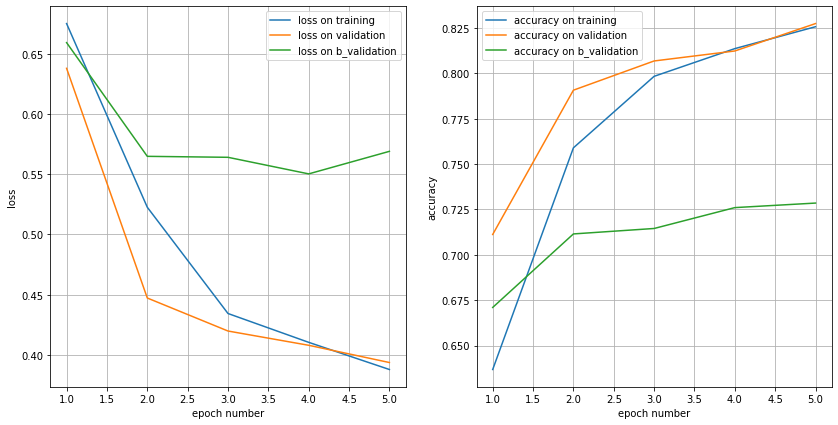

Epoch: 05s
	Train Loss: 0.388 | Train Acc: 82.57%
	 Val. Loss: 0.394 |  Val. Acc: 82.74%
	 Val_b. Loss: 0.569 |  Val_b. Acc: 72.85%


In [116]:
N_EPOCHS = 5

best_valid_loss = float('inf')

train_loss_history = []
valid_loss_history = []
valid_loss_history_b = []

train_acc_history = []
valid_acc_history = []
valid_acc_history_b = []

for epoch in range(N_EPOCHS):

    train_loss, train_acc = train(model, train_x_elmo, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, dev_x_elmo, criterion)
    valid_loss_b, valid_acc_b = evaluate(model, dev_b_x_elmo, criterion)
    
    train_loss_history.append(np.mean(train_loss))
    train_acc_history.append(np.mean(train_acc))
    valid_loss_history.append(np.mean(valid_loss))
    valid_acc_history.append(np.mean(valid_acc))
    valid_loss_history_b.append(np.mean(valid_loss_b))
    valid_acc_history_b.append(np.mean(valid_acc_b))

    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'bilstm-model-elmo.pt')

    clear_output(True)
    plt.figure(figsize=(14, 7))
    plt.subplot(121)
    plt.plot(np.arange(len(train_loss_history)) + 1, train_loss_history, label='loss on training')
    plt.plot(np.arange(len(valid_loss_history)) + 1, valid_loss_history, label='loss on validation')
    plt.plot(np.arange(len(valid_loss_history_b)) + 1, valid_loss_history_b, label='loss on b_validation')
    plt.ylabel('loss')
    plt.xlabel('epoch number')
    plt.legend()
    plt.grid()

    plt.subplot(122)
    plt.plot(np.arange(len(train_acc_history)) + 1, train_acc_history, label='accuracy on training')
    plt.plot(np.arange(len(valid_acc_history)) + 1, valid_acc_history, label='accuracy on validation')
    plt.plot(np.arange(len(valid_acc_history_b)) + 1, valid_acc_history_b, label='accuracy on b_validation')
    plt.ylabel('accuracy')
    plt.xlabel('epoch number')
    plt.legend()
    plt.grid()
    plt.show()

    print(f'Epoch: {epoch+1:02}s')
    print(f'\tTrain Loss: {np.mean(train_loss):.3f} | Train Acc: {np.mean(train_acc)*100:.2f}%')
    print(f'\t Val. Loss: {np.mean(valid_loss):.3f} |  Val. Acc: {np.mean(valid_acc)*100:.2f}%')
    print(f'\t Val_b. Loss: {np.mean(valid_loss_b):.3f} |  Val_b. Acc: {np.mean(valid_acc_b)*100:.2f}%')

#### 2.3.3 Use of document embeddings for text classification 



Use ``gensim`` to obtain document embeddings for all reviews. Build a model based on logistic regression using ``sklearn`` which load these embeddings for each document and performs a classification. 

_Discuss: with which configuration have you achieved the best score? What was the results? What is your opinion -- why some model has performed worse and some better?_

In [128]:
from gensim.models.keyedvectors import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import common_texts
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [119]:
documents_train = [TaggedDocument(words=doc, tags=[tag]) for doc,tag in zip(train_data['preprocessed text'].values,train_data['label'].values)]
documents_dev = [TaggedDocument(words=doc, tags=[tag]) for doc,tag in zip(dev_data['preprocessed text'].values,dev_data['label'].values)]
documents_dev_b = [TaggedDocument(words=doc, tags=[tag]) for doc,tag in zip(dev_b_data['preprocessed text'].values,dev_b_data['label'].values)]

In [120]:
model_dbow = Doc2Vec(vector_size=300, min_count=2, epochs=10, workers=2)
model_dbow.build_vocab(documents_train)

In [121]:
%%time
model_dbow.train(documents_train, total_examples=model_dbow.corpus_count, epochs=model_dbow.epochs)

CPU times: user 1min 7s, sys: 1.45 s, total: 1min 9s
Wall time: 36.4 s


In [122]:
def vec_for_learning(model, tagged_docs):
    regressors = [model.infer_vector(doc.words) for doc in tagged_docs]
    return regressors

In [123]:
X_train = vec_for_learning(model_dbow, documents_train)
X_dev = vec_for_learning(model_dbow, documents_dev)
X_dev_b = vec_for_learning(model_dbow, documents_dev_b)

In [130]:
%%time

param_grid_logit = {'C':  np.logspace(-5, 3, 9)}
logreg = LogisticRegression(random_state=42, n_jobs=-1)
grid_logit = GridSearchCV(logreg, param_grid_logit, cv=3, n_jobs=-1)

grid_logit.fit(X_train, train_data['label'].values)
grid_logit.best_params_, grid_logit.best_score_

CPU times: user 14.3 s, sys: 315 ms, total: 14.7 s
Wall time: 18.1 s


In [131]:
logreg = LogisticRegression(random_state=42, n_jobs=-1,C=0.1)
logreg.fit(X_train,train_data['label'].values)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [132]:
pred_train = logreg.predict(X_train)
pred_test = logreg.predict(X_dev)
pred_test_b = logreg.predict(X_dev_b)
print("Train accuracy: ", round(accuracy_score(pred_train, train_data['label'].values), 3))
print("Dev accuracy: ", round(accuracy_score(pred_test, dev_data['label'].values),3))
print("Dev-b accuracy: ", round(accuracy_score(pred_test_b, dev_b_data['label'].values), 3))

Train accuracy:  0.924
Dev accuracy:  0.847
Dev-b accuracy:  0.678


```
As it can be seen, the best results achieves Logistic Regression model with 
parameter C=0.1. The accuracy on train for this model is equal to 92%.

Comparing LogReg from sklearn with LogReg implemented using PyTorch, we can 
notice that the second model gives better accuracy on b_validation. For the 
model from sklearn accuracy on b_val = 68% and for the model implemented using 
Pytorch it is equal to 74%.
```

## 3. Research part

### 3.1 Logistic Regression

Apart form classical gradient descent approach there are a lot of SGD variations, such as Adam, Adagrad, RMSProp, that are frequently used in the real-word cases. ([short](http://cs231n.github.io/neural-networks-3/#update) and [long](http://ruder.io/optimizing-gradient-descent/index.html#momentum) reviews on these approaches). The key thing about those approaches: apart from the gradients they use second derivative (momentum) for the next step.


1. Implement Momentum or Adagrad and use it to train your logreg. Draw several plots for training with different hyperparameter values. What can be observed from the results and what conclusions could be made?

#### Adam

In [166]:
N_EPOCHS = 200
LEARNING_RATE = 0.001
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-5

model = LogisticRegression(NUM_LABELS, VOCAB_SIZE)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train, losses_train, accur_val, losses_val, accur_val_b, losses_val_b = train(model=model, train_dataloader=train_dataloader, 
                                                                                    dev_dataloader=dev_dataloader,dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, 
                                                                                    loss_function= loss_function, N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

Loss and accuracy for model with Adam optimizer
Accuracy on validation after 200 epochs: 0.85
Accuracy on b_validation after 200 epochs: 0.746


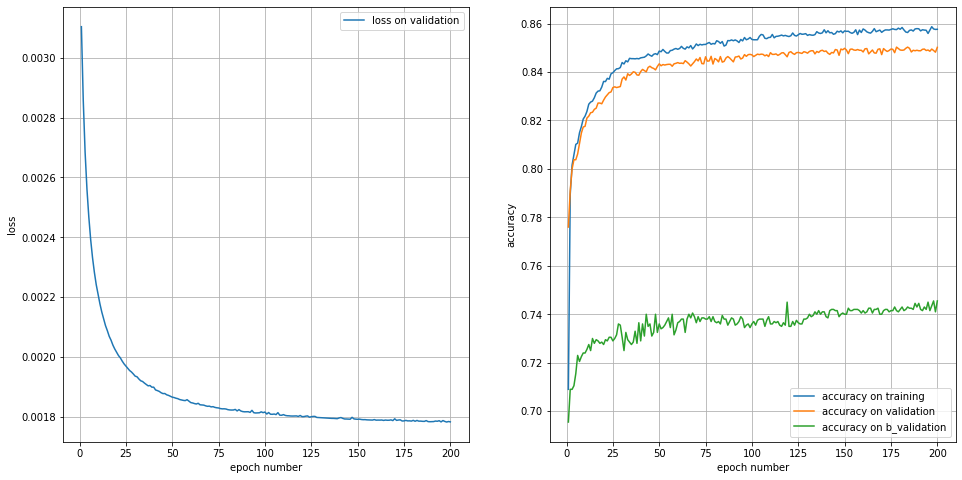

In [167]:
print('Loss and accuracy for model with Adam optimizer')
print('Accuracy on validation after 200 epochs:',round(accur_val[-1],3))
print('Accuracy on b_validation after 200 epochs:',round(accur_val_b[-1],3))
plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val)) + 1, losses_val, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train)) + 1, accur_train, label='accuracy on training')
plt.plot(np.arange(len(accur_val)) + 1, accur_val, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b)) + 1, accur_val_b, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()



#### SGD (Nesterov momentum)

In [168]:
N_EPOCHS = 200
LEARNING_RATE = 0.1
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-5

model = LogisticRegression(NUM_LABELS, VOCAB_SIZE)
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train, losses_train, accur_val, losses_val, accur_val_b, losses_val_b = train(model=model, train_dataloader=train_dataloader, 
                                                                                    dev_dataloader=dev_dataloader,dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, 
                                                                                    loss_function= loss_function, N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

Loss and accuracy for model with SGD optimizer (Nesterov momentum)
Accuracy on validation after 200 epochs: 0.841
Accuracy on b_validation after 200 epochs: 0.734


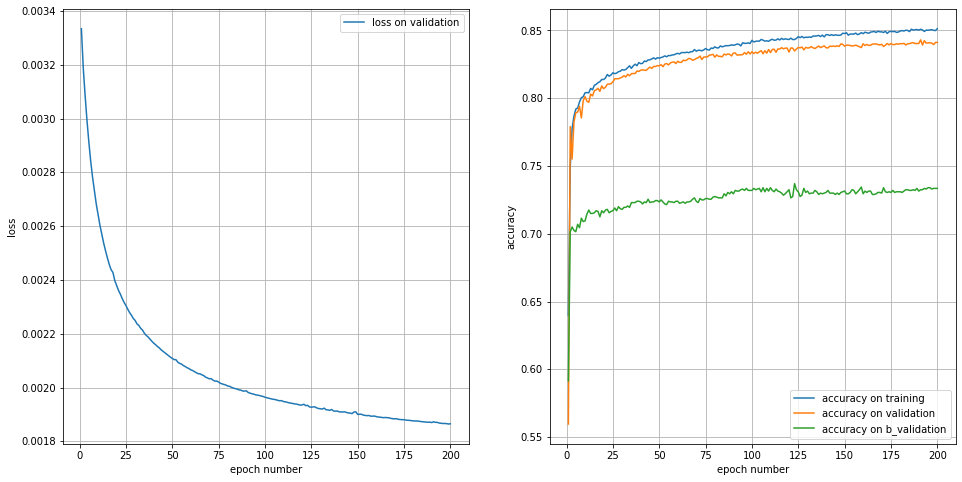

In [169]:
print('Loss and accuracy for model with SGD optimizer (Nesterov momentum)')
print('Accuracy on validation after 200 epochs:',round(accur_val[-1],3))
print('Accuracy on b_validation after 200 epochs:',round(accur_val_b[-1],3))
plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val)) + 1, losses_val, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train)) + 1, accur_train, label='accuracy on training')
plt.plot(np.arange(len(accur_val)) + 1, accur_val, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b)) + 1, accur_val_b, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()



#### Adagrad

In [170]:
N_EPOCHS = 200
LEARNING_RATE = 0.01
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-5

model = LogisticRegression(NUM_LABELS, VOCAB_SIZE)
optimizer = optim.Adagrad(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train, losses_train, accur_val, losses_val, accur_val_b, losses_val_b = train(model=model, train_dataloader=train_dataloader, 
                                                                                    dev_dataloader=dev_dataloader,dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, 
                                                                                    loss_function= loss_function, N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

Loss and accuracy for model with Adagrad optimizer
Accuracy on validation after 200 epochs: 0.826
Accuracy on b_validation after 200 epochs: 0.731


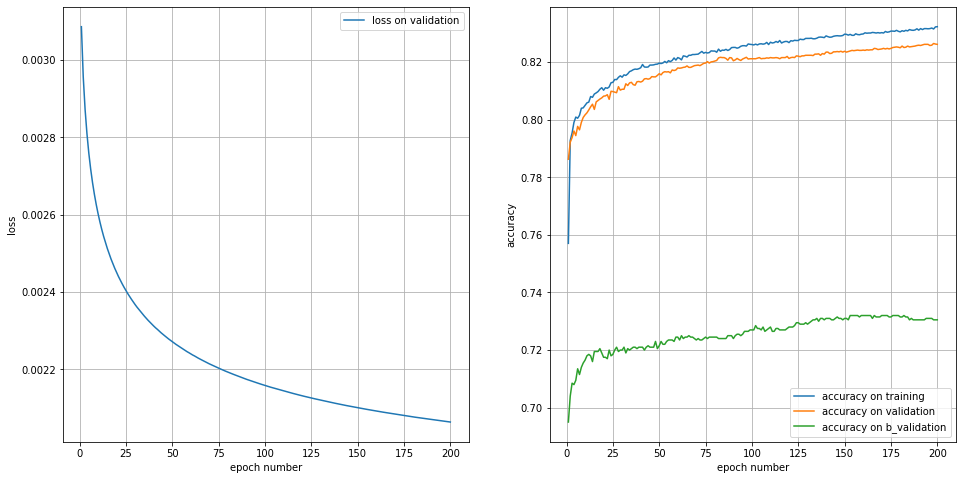

In [171]:
print('Loss and accuracy for model with Adagrad optimizer')
print('Accuracy on validation after 200 epochs:',round(accur_val[-1],3))
print('Accuracy on b_validation after 200 epochs:',round(accur_val_b[-1],3))
plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val)) + 1, losses_val, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train)) + 1, accur_train, label='accuracy on training')
plt.plot(np.arange(len(accur_val)) + 1, accur_val, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b)) + 1, accur_val_b, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()



#### RMSprop

In [163]:
N_EPOCHS = 200
LEARNING_RATE = 0.001
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-5

model = LogisticRegression(NUM_LABELS, VOCAB_SIZE)
optimizer = optim.RMSprop(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train, losses_train, accur_val, losses_val, accur_val_b, losses_val_b = train(model=model, train_dataloader=train_dataloader, 
                                                                                    dev_dataloader=dev_dataloader,dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, 
                                                                                    loss_function= loss_function, N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

Loss and accuracy for model with RMSprop optimizer
Accuracy onvalidation after 200 epochs: 0.85
Accuracy on b_validation after 200 epochs: 0.744


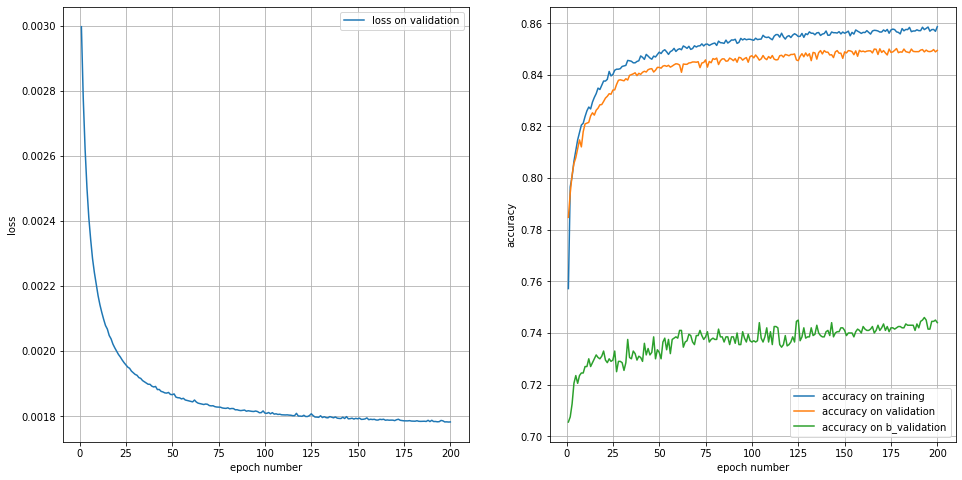

In [165]:
print('Loss and accuracy for model with RMSprop optimizer')
print('Accuracy onvalidation after 200 epochs:',round(accur_val[-1],3))
print('Accuracy on b_validation after 200 epochs:',round(accur_val_b[-1],3))
plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val)) + 1, losses_val, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train)) + 1, accur_train, label='accuracy on training')
plt.plot(np.arange(len(accur_val)) + 1, accur_val, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b)) + 1, accur_val_b, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

```
As it can be seen, for the LogReg model trained for 200 epochs, the best
accuracy results on b_vakidation set shows Adam optimizer. The accuracy for it 
is equal to 0.746. 

On validation set the best performanse show Adam and RMSprop optimizers. The 
accuracy for them is equal to 0.85.

As a future development the addition selection of parameters such as learning 
rate and weight decay can be done, it can improve the quality of the model.
```

### 3.2 Feed-forward Neural Network

1. Try to improve your neural classifier performance expermenting with model architecture (change number of layers and their sizes). Draw the training curves (loss and accuracy) showing dependency of 1) layer size 2) number of layers. According to your experiments, which structure should be considered as the most efficient?

#### Different Layer Sizes

In [232]:
class FFNN(nn.Module):
    def __init__(self, vocab_size, num_classes, hidden_layer_size):
        super().__init__()
        self.hidden_layer = nn.Linear(vocab_size, hidden_layer_size)
        self.relu = torch.nn.ReLU()
        self.output_layer = nn.Linear(hidden_layer_size, num_classes)
    
    def forward(self, features):
        intermid = self.hidden_layer(features)
        intermid = self.relu(intermid)
        intermid = self.output_layer(intermid)
        output = F.log_softmax(intermid, dim=1)
        return output

In [236]:
N_EPOCHS = 100
LEARNING_RATE = 0.0001
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-5
hidden_layer_size = 30

model = FFNN(VOCAB_SIZE, NUM_LABELS, hidden_layer_size)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train, losses_train, accur_val, losses_val, accur_val_b, losses_val_b= train(model=model, train_dataloader=train_dataloader, 
                                                                                    dev_dataloader=dev_dataloader,dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, 
                                                                                    loss_function= loss_function, N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

Loss and accuracy for model with hidden_layer_size = 30
Accuracy onvalidation after 100 epochs: 0.85
Accuracy on b_validation after 100 epochs: 0.74


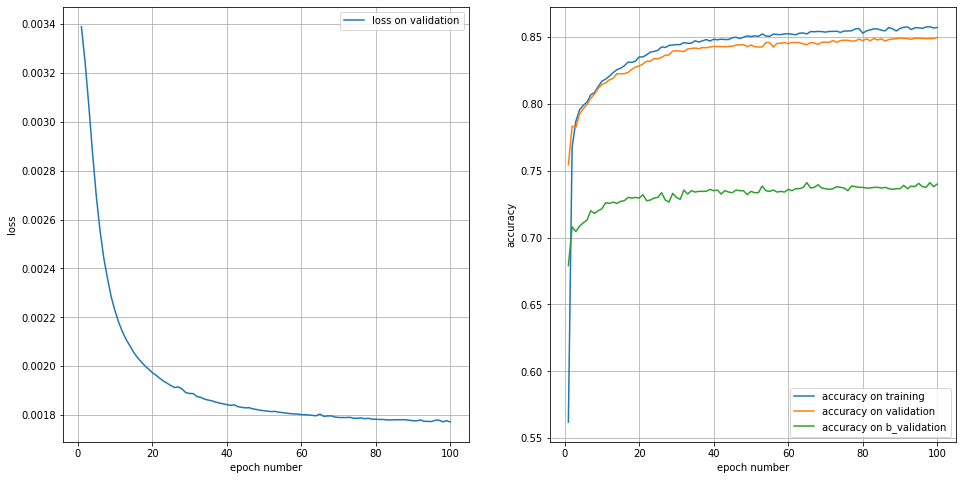

In [237]:
print('Loss and accuracy for model with hidden_layer_size = 30')
print('Accuracy onvalidation after 100 epochs:',round(accur_val[-1],3))
print('Accuracy on b_validation after 100 epochs:',round(accur_val_b[-1],3))
plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val)) + 1, losses_val, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train)) + 1, accur_train, label='accuracy on training')
plt.plot(np.arange(len(accur_val)) + 1, accur_val, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b)) + 1, accur_val_b, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

In [238]:
N_EPOCHS = 100
LEARNING_RATE = 0.0001
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-5
hidden_layer_size = 300

model = FFNN(VOCAB_SIZE, NUM_LABELS, hidden_layer_size)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train, losses_train, accur_val, losses_val, accur_val_b, losses_val_b= train(model=model, train_dataloader=train_dataloader, 
                                                                                    dev_dataloader=dev_dataloader,dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, 
                                                                                    loss_function= loss_function, N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

Loss and accuracy for model with hidden_layer_size = 300
Accuracy onvalidation after 100 epochs: 0.851
Accuracy on b_validation after 100 epochs: 0.744


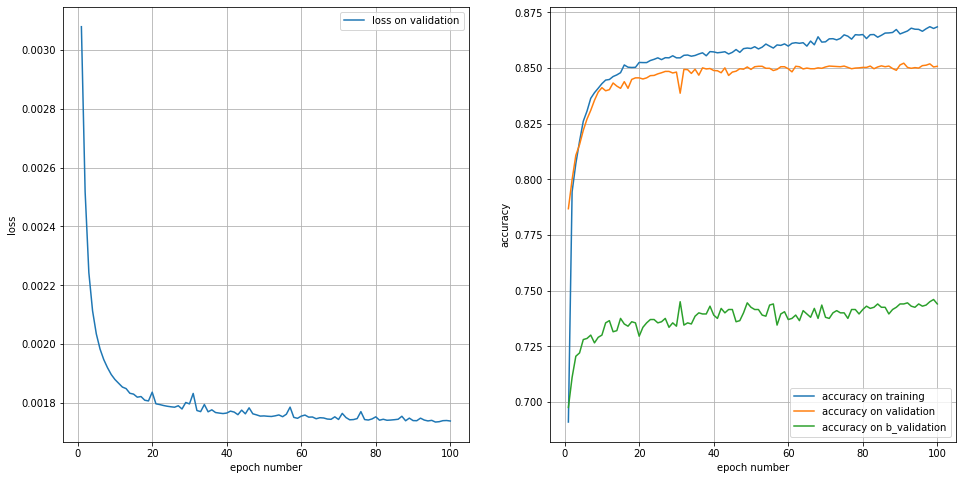

In [239]:
print('Loss and accuracy for model with hidden_layer_size = 300')
print('Accuracy onvalidation after 100 epochs:',round(accur_val[-1],3))
print('Accuracy on b_validation after 100 epochs:',round(accur_val_b[-1],3))
plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val)) + 1, losses_val, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train)) + 1, accur_train, label='accuracy on training')
plt.plot(np.arange(len(accur_val)) + 1, accur_val, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b)) + 1, accur_val_b, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

In [240]:
N_EPOCHS = 100
LEARNING_RATE = 0.0001
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-5
hidden_layer_size = 1000

model = FFNN(VOCAB_SIZE, NUM_LABELS, hidden_layer_size)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train, losses_train, accur_val, losses_val, accur_val_b, losses_val_b= train(model=model, train_dataloader=train_dataloader, 
                                                                                    dev_dataloader=dev_dataloader,dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, 
                                                                                    loss_function= loss_function, N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

Loss and accuracy for model with hidden_layer_size = 1000
Accuracy onvalidation after 100 epochs: 0.853
Accuracy on b_validation after 100 epochs: 0.749


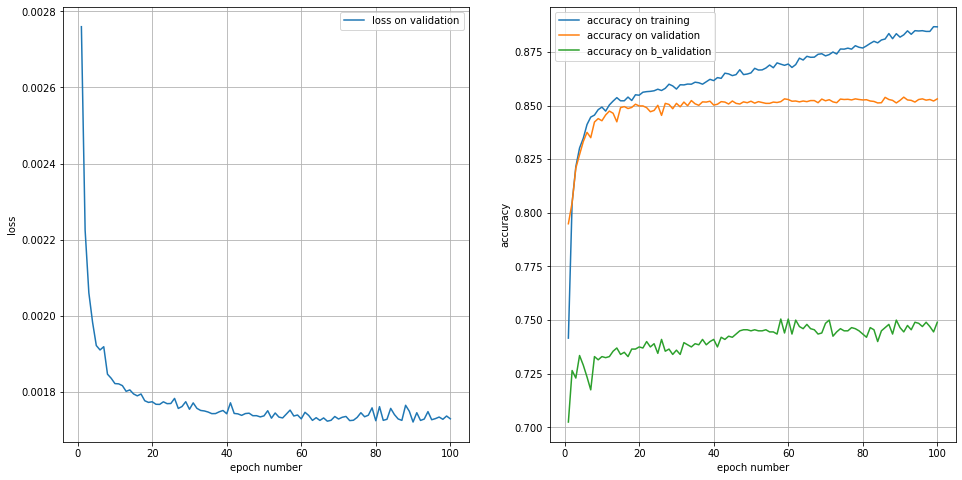

In [241]:
print('Loss and accuracy for model with hidden_layer_size = 1000')
print('Accuracy onvalidation after 100 epochs:',round(accur_val[-1],3))
print('Accuracy on b_validation after 100 epochs:',round(accur_val_b[-1],3))
plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val)) + 1, losses_val, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train)) + 1, accur_train, label='accuracy on training')
plt.plot(np.arange(len(accur_val)) + 1, accur_val, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b)) + 1, accur_val_b, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

#### Different number of layers

In [246]:
class FFNN(nn.Module):
    def __init__(self, vocab_size, num_classes, hidden_layer_size):
        super().__init__()
        self.hidden_layer = nn.Linear(vocab_size, hidden_layer_size)
        self.relu = torch.nn.ReLU()
        self.output_layer = nn.Linear(hidden_layer_size, num_classes)
    
    def forward(self, features):
        intermid = self.hidden_layer(features)
        intermid = self.relu(intermid)
        intermid = self.output_layer(intermid)
        output = F.log_softmax(intermid, dim=1)
        return output

In [247]:
N_EPOCHS = 100
LEARNING_RATE = 0.0001
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-5
hidden_layer_size = 100

model = FFNN(VOCAB_SIZE, NUM_LABELS, hidden_layer_size)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train, losses_train, accur_val, losses_val, accur_val_b, losses_val_b= train(model=model, train_dataloader=train_dataloader, 
                                                                                    dev_dataloader=dev_dataloader,dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, 
                                                                                    loss_function= loss_function, N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

Loss and accuracy for model with one hidden layer
Accuracy onvalidation after 100 epochs: 0.849
Accuracy on b_validation after 100 epochs: 0.739


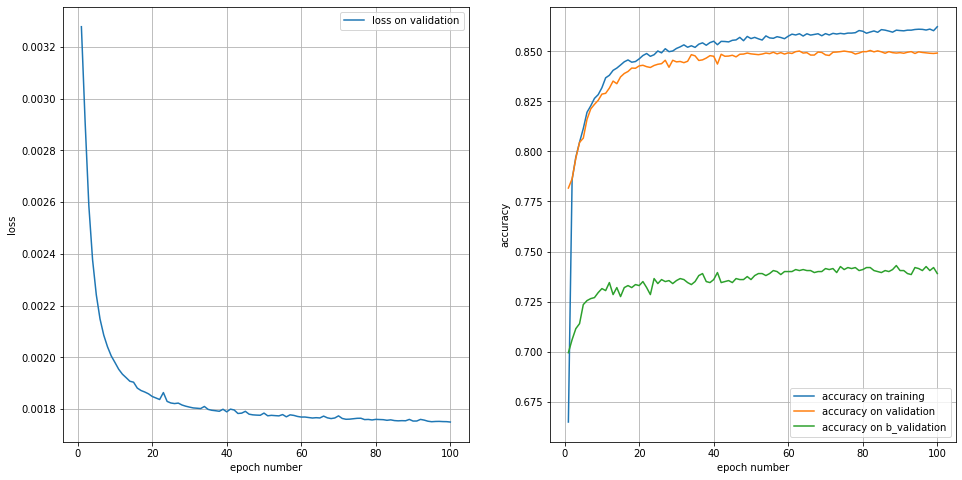

In [248]:
print('Loss and accuracy for model with one hidden layer')
print('Accuracy onvalidation after 100 epochs:',round(accur_val[-1],3))
print('Accuracy on b_validation after 100 epochs:',round(accur_val_b[-1],3))
plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val)) + 1, losses_val, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train)) + 1, accur_train, label='accuracy on training')
plt.plot(np.arange(len(accur_val)) + 1, accur_val, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b)) + 1, accur_val_b, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

In [249]:
class FFNN2(nn.Module):
    def __init__(self, vocab_size, num_classes, hidden_layer_size):
        super().__init__()
        self.hidden_layer_1 = nn.Linear(vocab_size, hidden_layer_size)
        self.relu_1 = torch.nn.ReLU()
        self.hidden_layer_2 = nn.Linear(hidden_layer_size, hidden_layer_size//2)
        self.relu_2 = torch.nn.ReLU()
        self.output_layer = nn.Linear(hidden_layer_size//2, num_classes)
    
    def forward(self, features):
        intermid = self.hidden_layer_1(features)
        intermid = self.relu_1(intermid)
        intermid = self.hidden_layer_2(intermid)
        intermid = self.relu_2(intermid)
        intermid = self.output_layer(intermid)
        output = F.log_softmax(intermid, dim=1)
        return output

In [250]:
N_EPOCHS = 100
LEARNING_RATE = 0.0001
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-5
hidden_layer_size = 100

model = FFNN2(VOCAB_SIZE, NUM_LABELS, hidden_layer_size)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train, losses_train, accur_val, losses_val, accur_val_b, losses_val_b= train(model=model, train_dataloader=train_dataloader, 
                                                                                    dev_dataloader=dev_dataloader,dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, 
                                                                                    loss_function= loss_function, N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

Loss and accuracy for model with two hidden layers
Accuracy onvalidation after 100 epochs: 0.852
Accuracy on b_validation after 100 epochs: 0.739


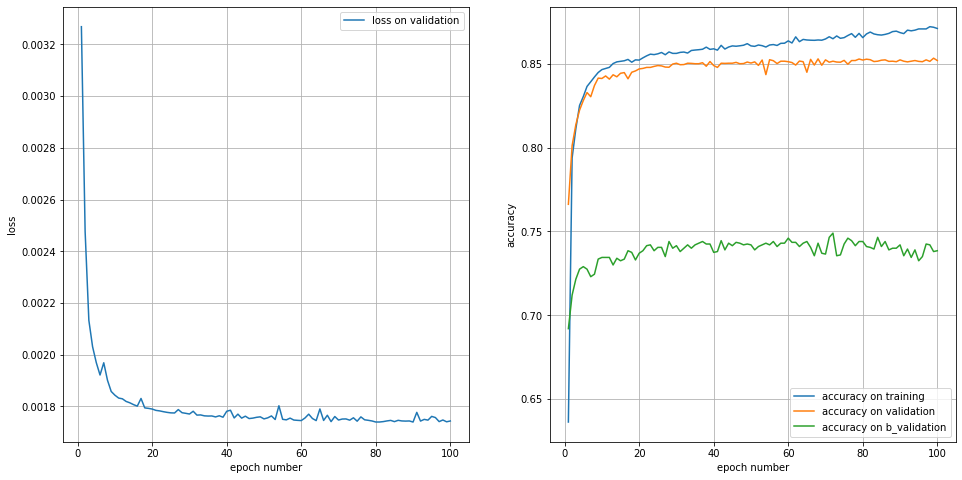

In [251]:
print('Loss and accuracy for model with two hidden layers')
print('Accuracy onvalidation after 100 epochs:',round(accur_val[-1],3))
print('Accuracy on b_validation after 100 epochs:',round(accur_val_b[-1],3))
plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val)) + 1, losses_val, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train)) + 1, accur_train, label='accuracy on training')
plt.plot(np.arange(len(accur_val)) + 1, accur_val, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b)) + 1, accur_val_b, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

```

When the hidden_layer_size is equal to 300 the FFNN shows the best performance
according to the accuracy on b_validation. When the hidden_layer_size is equal
to 1000 the model overfits because accuracy on train grows significantly but 
accuracy on validation doesn't change. And the hidden_layer_size = 30 also shows good results. 

Trying to increase number of hidden layers doesn't improve the performance, 
therefore, one hidden layer is an optimal choice for this task.

```

2. Try other gradient descent algorithms to your model (e.g. Adam, Adagrad, RMSProp).

#### Adam

In [252]:
N_EPOCHS = 100
LEARNING_RATE = 0.0001
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-5
hidden_layer_size = 30

model = FFNN(VOCAB_SIZE, NUM_LABELS, hidden_layer_size)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train, losses_train, accur_val, losses_val, accur_val_b, losses_val_b= train(model=model, train_dataloader=train_dataloader, 
                                                                                    dev_dataloader=dev_dataloader,dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, 
                                                                                    loss_function= loss_function, N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

Loss and accuracy for model with Adam
Accuracy onvalidation after 100 epochs: 0.848
Accuracy on b_validation after 100 epochs: 0.736


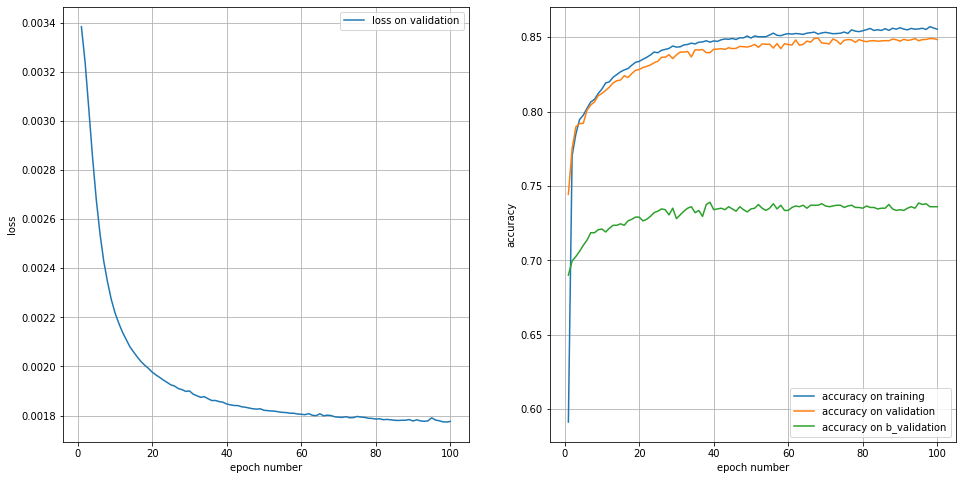

In [253]:
print('Loss and accuracy for model with Adam')
print('Accuracy onvalidation after 100 epochs:',round(accur_val[-1],3))
print('Accuracy on b_validation after 100 epochs:',round(accur_val_b[-1],3))
plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val)) + 1, losses_val, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train)) + 1, accur_train, label='accuracy on training')
plt.plot(np.arange(len(accur_val)) + 1, accur_val, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b)) + 1, accur_val_b, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

#### Adagrad

In [257]:
N_EPOCHS = 100
LEARNING_RATE = 0.01
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-5
hidden_layer_size = 30

model = FFNN(VOCAB_SIZE, NUM_LABELS, hidden_layer_size)
optimizer = optim.Adagrad(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train, losses_train, accur_val, losses_val, accur_val_b, losses_val_b= train(model=model, train_dataloader=train_dataloader, 
                                                                                    dev_dataloader=dev_dataloader,dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, 
                                                                                    loss_function= loss_function, N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

Loss and accuracy for model with Adagrad
Accuracy onvalidation after 100 epochs: 0.851
Accuracy on b_validation after 100 epochs: 0.737


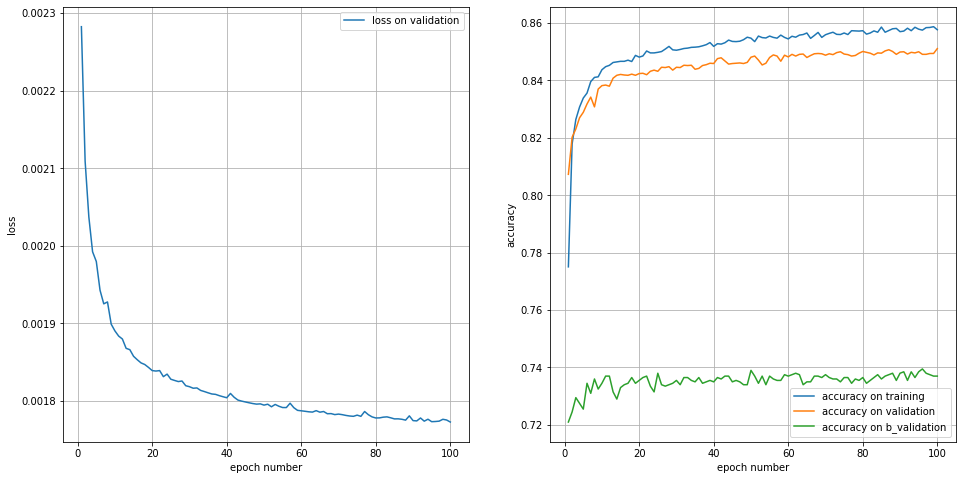

In [258]:
print('Loss and accuracy for model with Adagrad')
print('Accuracy onvalidation after 100 epochs:',round(accur_val[-1],3))
print('Accuracy on b_validation after 100 epochs:',round(accur_val_b[-1],3))
plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val)) + 1, losses_val, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train)) + 1, accur_train, label='accuracy on training')
plt.plot(np.arange(len(accur_val)) + 1, accur_val, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b)) + 1, accur_val_b, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

#### RMSprop

In [261]:
N_EPOCHS = 100
LEARNING_RATE = 0.0001
NUM_LABELS = 2
VOCAB_SIZE=300
weight_decay=1e-5
hidden_layer_size = 30

model = FFNN(VOCAB_SIZE, NUM_LABELS, hidden_layer_size)
optimizer = optim.RMSprop(model.parameters(), lr=LEARNING_RATE, weight_decay=weight_decay)
loss_function = nn.NLLLoss()
accur_train, losses_train, accur_val, losses_val, accur_val_b, losses_val_b= train(model=model, train_dataloader=train_dataloader, 
                                                                                    dev_dataloader=dev_dataloader,dev_b_dataloader=dev_b_dataloader, optimizer= optimizer, 
                                                                                    loss_function= loss_function, N_EPOCHS=N_EPOCHS , batch_size=batch_size)
       

Loss and accuracy for model with RMSProp
Accuracy onvalidation after 100 epochs: 0.849
Accuracy on b_validation after 100 epochs: 0.738


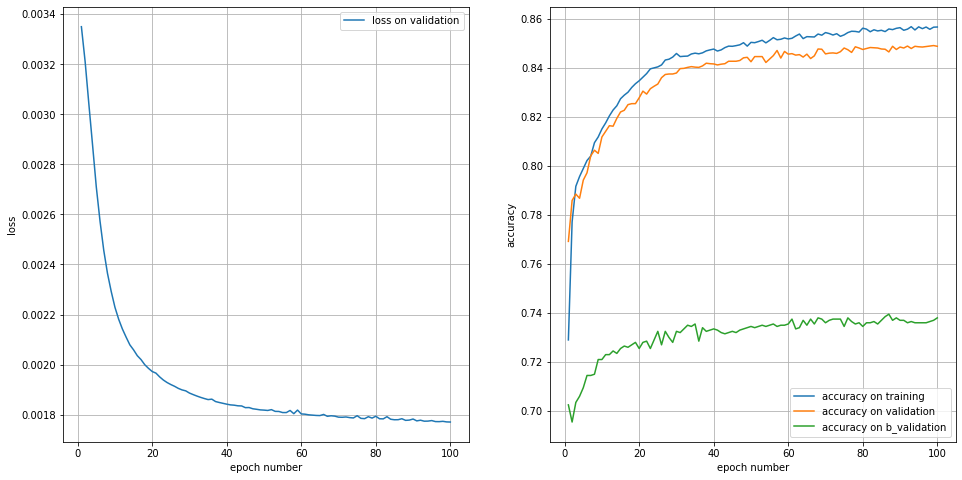

In [262]:
print('Loss and accuracy for model with RMSProp')
print('Accuracy onvalidation after 100 epochs:',round(accur_val[-1],3))
print('Accuracy on b_validation after 100 epochs:',round(accur_val_b[-1],3))
plt.figure(figsize=(16, 8))
plt.subplot(121)
# plt.plot(np.arange(len(losses_train)) + 1, losses_train, label='loss on training')
plt.plot(np.arange(len(losses_val)) + 1, losses_val, label='loss on validation')
plt.ylabel('loss')
plt.xlabel('epoch number')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(np.arange(len(accur_train)) + 1, accur_train, label='accuracy on training')
plt.plot(np.arange(len(accur_val)) + 1, accur_val, label='accuracy on validation')
plt.plot(np.arange(len(accur_val_b)) + 1, accur_val_b, label='accuracy on b_validation')
plt.ylabel('accuracy')
plt.xlabel('epoch number')
plt.legend()
plt.grid()
plt.show()

```

For FFNN with one hidden layer and hidden_layer_size = 30 RMSProp shows the 
best performance on b_validation with accuracy = 0.738 and  Adagrad shows the 
best performance on validation with accuracy = 0.851.

```

### 3.4 Recurrent Neural Networks

#### 3.4.1 Different types of embeddings


Compare performance of [GloVe](http://nlp.stanford.edu/data/wordvecs/glove.6B.zip), [word2vec](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing) models to the model which has randomly initialized embedding layer (no pre-traied embeddings are used). Plot the results depending on the type of used embeddings. 

#### Random initialization

In [58]:
dim_vocab_Glove = nn.Embedding.from_pretrained(embeddings)

In [53]:
class BiLSTM_non_pretrained(nn.Module):
    def __init__(self, in_dim, out_dim, hidden_dim=128, lstm_layer=1, output=2):
        
        super(BiLSTM_non_pretrained, self).__init__()
        self.hidden_dim = hidden_dim
        
        # load pre-trained embeddings
        self.embedding = nn.Embedding(in_dim,out_dim)
        self.embedding.weight.data.uniform_(-1, 1)
        # embeddings are not fine-tuned
        self.embedding.weight.requires_grad = False
        
        # RNN layer with LSTM cells
        # OR self.lstm = NaiveLSTM(input_sz = self.embedding.embedding_dim, hidden_sz = hidden_dim)
        self.lstm = nn.LSTM(input_size=self.embedding.embedding_dim,
                            hidden_size=hidden_dim,
                            num_layers=lstm_layer, 
                            bidirectional=True)
        # dense layer
        self.output = nn.Linear(hidden_dim*2, output)
    
    def forward(self, sents):
        x = self.embedding(sents)
        
        # the original dimensions of torch LSTM's output are: (seq_len, batch, num_directions * hidden_size)
        lstm_out, _ = self.lstm(x)
        
        # reshape to get the tensor of dimensions (seq_len, batch, num_directions, hidden_size)
        lstm_out = lstm_out.view(x.shape[0], -1, 2, self.hidden_dim)#.squeeze(1)
        
        # lstm_out[:, :, 0, :] -- output of the forward LSTM
        # lstm_out[:, :, 1, :] -- output of the backward LSTM
        # we take the last hidden state of the forward LSTM and the first hidden state of the backward LSTM
        dense_input = torch.cat((lstm_out[-1, :, 0, :], lstm_out[0, :, 1, :]), dim=1)
        
        y = self.output(dense_input).view([1, 2])
        return y

In [55]:
#Initialise the model, optimiser, and loss:
hidden_dim = 128
layers = 1
model_non_pretrain = BiLSTM_non_pretrained(dim_vocab_Glove.num_embeddings, dim_vocab_Glove.embedding_dim, hidden_dim, lstm_layer=layers)
optimizer = optim.SGD(model_non_pretrain.parameters(), lr=1e-3)
criterion = nn.BCEWithLogitsLoss()

#Transfer the model and loss to GPU:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_non_pretrain = model_non_pretrain.to(device)
criterion = criterion.to(device)

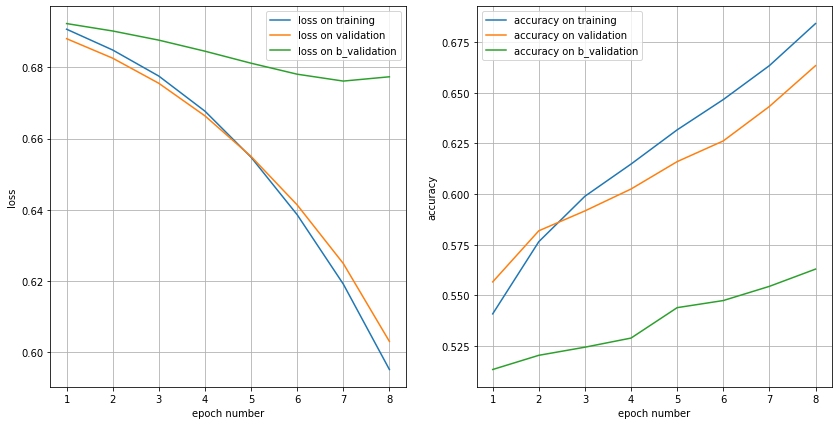

Epoch: 08s
	Train Loss: 0.595 | Train Acc: 68.41%
	 Val. Loss: 0.603 |  Val. Acc: 66.33%
	 Test Loss: 0.677 |  Test Acc: 56.30%


In [56]:
N_EPOCHS = 8

best_valid_loss = float('inf')

train_loss_history = []
valid_loss_history = []

train_acc_history = []
valid_acc_history = []

valid_loss_history_b = []
valid_acc_history_b = []

for epoch in range(N_EPOCHS):

    
    train_loss, train_acc = train(model_non_pretrain, train_x, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model_non_pretrain, dev_x, criterion)
    valid_loss_b, valid_acc_b = evaluate(model_non_pretrain, dev_b_x, criterion)
    
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)
    valid_loss_history.append(valid_loss)
    valid_acc_history.append(valid_acc)
    valid_loss_history_b.append(valid_loss_b)
    valid_acc_history_b.append(valid_acc_b)

    clear_output(True)
    plt.figure(figsize=(14, 7))
    plt.subplot(121)
    plt.plot(np.arange(len(train_loss_history)) + 1, train_loss_history, label='loss on training')
    plt.plot(np.arange(len(valid_loss_history)) + 1, valid_loss_history, label='loss on validation')
    plt.plot(np.arange(len(valid_loss_history_b)) + 1, valid_loss_history_b, label='loss on b_validation')
    plt.ylabel('loss')
    plt.xlabel('epoch number')
    plt.legend()
    plt.grid()

    plt.subplot(122)
    plt.plot(np.arange(len(train_acc_history)) + 1, train_acc_history, label='accuracy on training')
    plt.plot(np.arange(len(valid_acc_history)) + 1, valid_acc_history, label='accuracy on validation')
    plt.plot(np.arange(len(valid_acc_history_b)) + 1, valid_acc_history_b, label='accuracy on b_validation')
    plt.ylabel('accuracy')
    plt.xlabel('epoch number')
    plt.legend()
    plt.grid()
    plt.show()

    print(f'Epoch: {epoch+1:02}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    print(f'\t Test Loss: {valid_loss_b:.3f} |  Test Acc: {valid_acc_b*100:.2f}%')

```

Comparing our previous model trained on the Glove embeddings with this one 
(with randomly initialized embeddinhs, initialization was from the uniform 
distribution) we can see that the first model performs much better (the 
difference in accuracies is almost 20%).

```

#### 3.4.2 Impact of hyper-parameter choice

Try different numbers of hidden layers, LSTM cells used in each layers, learning rates, and other meta-parameters. Present plots which demonstrate performance of the model depending of values of these meta-parameters. Does bi-directional LSTM works better than uni-directioanl LSTM for this task? 


In [46]:
#Initialise the model, optimiser, and loss:
hidden_dim = 128
layers = 2
model = BiLSTM(embeddings, hidden_dim, lstm_layer=layers)
optimizer = optim.SGD(model.parameters(), lr=1e-3)
criterion = nn.BCEWithLogitsLoss()

#Transfer the model and loss to GPU:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)

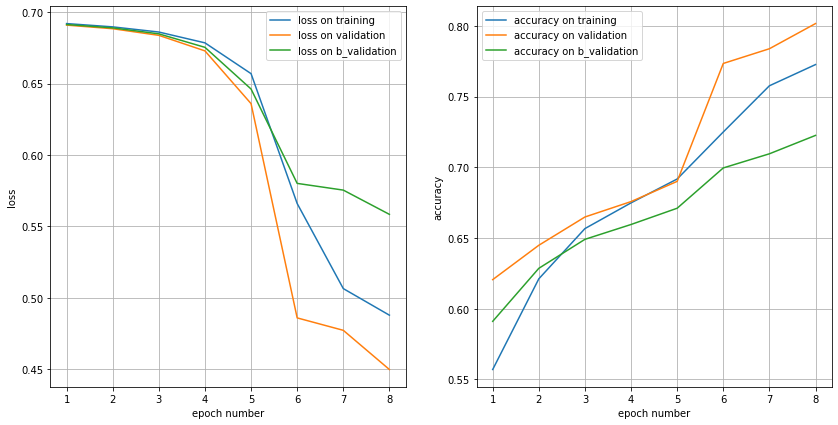

Bi-LSTM with two hidden layers
Epoch: 08s
	Train Loss: 0.488 | Train Acc: 77.26%
	 Val. Loss: 0.450 |  Val. Acc: 80.16%
	 Test Loss: 0.558 |  Test Acc: 72.25%


In [47]:
N_EPOCHS = 8

best_valid_loss = float('inf')

train_loss_history = []
valid_loss_history = []

train_acc_history = []
valid_acc_history = []

valid_loss_history_b = []
valid_acc_history_b = []

for epoch in range(N_EPOCHS):

    
    train_loss, train_acc = train(model, train_x, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, dev_x, criterion)
    valid_loss_b, valid_acc_b = evaluate(model, dev_b_x, criterion)
    
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)
    valid_loss_history.append(valid_loss)
    valid_acc_history.append(valid_acc)
    valid_loss_history_b.append(valid_loss_b)
    valid_acc_history_b.append(valid_acc_b)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'bilstm-model.pt')

    clear_output(True)
    plt.figure(figsize=(14, 7))
    plt.subplot(121)
    plt.plot(np.arange(len(train_loss_history)) + 1, train_loss_history, label='loss on training')
    plt.plot(np.arange(len(valid_loss_history)) + 1, valid_loss_history, label='loss on validation')
    plt.plot(np.arange(len(valid_loss_history_b)) + 1, valid_loss_history_b, label='loss on b_validation')
    plt.ylabel('loss')
    plt.xlabel('epoch number')
    plt.legend()
    plt.grid()

    plt.subplot(122)
    plt.plot(np.arange(len(train_acc_history)) + 1, train_acc_history, label='accuracy on training')
    plt.plot(np.arange(len(valid_acc_history)) + 1, valid_acc_history, label='accuracy on validation')
    plt.plot(np.arange(len(valid_acc_history_b)) + 1, valid_acc_history_b, label='accuracy on b_validation')
    plt.ylabel('accuracy')
    plt.xlabel('epoch number')
    plt.legend()
    plt.grid()
    plt.show()

    print('Bi-LSTM with two hidden layers')
    print(f'Epoch: {epoch+1:02}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    print(f'\t Test Loss: {valid_loss_b:.3f} |  Test Acc: {valid_acc_b*100:.2f}%')

In [50]:
#Initialise the model, optimiser, and loss:
hidden_dim = 128
layers = 1
model = BiLSTM(embeddings, hidden_dim, lstm_layer=layers)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
criterion = nn.BCEWithLogitsLoss()

#Transfer the model and loss to GPU:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)

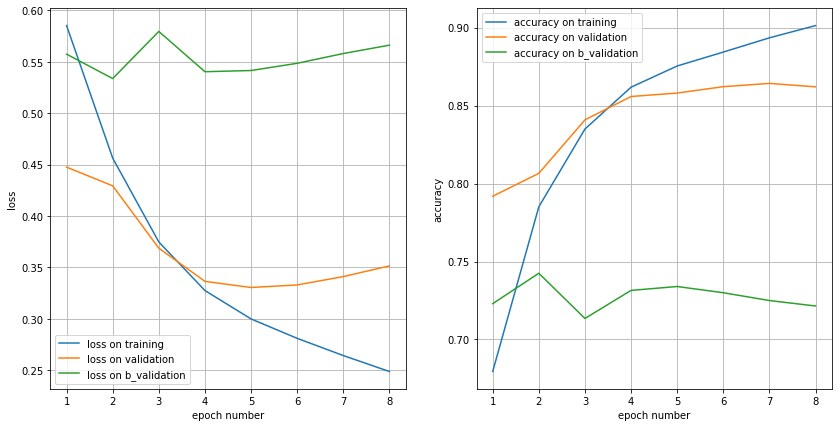

Bi-LSTM with different lr = 1e-2
Epoch: 08s
	Train Loss: 0.249 | Train Acc: 90.14%
	 Val. Loss: 0.352 |  Val. Acc: 86.21%
	 Test Loss: 0.566 |  Test Acc: 72.15%


In [51]:
N_EPOCHS = 8

best_valid_loss = float('inf')

train_loss_history = []
valid_loss_history = []

train_acc_history = []
valid_acc_history = []

valid_loss_history_b = []
valid_acc_history_b = []

for epoch in range(N_EPOCHS):

    
    train_loss, train_acc = train(model, train_x, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, dev_x, criterion)
    valid_loss_b, valid_acc_b = evaluate(model, dev_b_x, criterion)
    
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)
    valid_loss_history.append(valid_loss)
    valid_acc_history.append(valid_acc)
    valid_loss_history_b.append(valid_loss_b)
    valid_acc_history_b.append(valid_acc_b)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'bilstm-model.pt')

    clear_output(True)
    plt.figure(figsize=(14, 7))
    plt.subplot(121)
    plt.plot(np.arange(len(train_loss_history)) + 1, train_loss_history, label='loss on training')
    plt.plot(np.arange(len(valid_loss_history)) + 1, valid_loss_history, label='loss on validation')
    plt.plot(np.arange(len(valid_loss_history_b)) + 1, valid_loss_history_b, label='loss on b_validation')
    plt.ylabel('loss')
    plt.xlabel('epoch number')
    plt.legend()
    plt.grid()

    plt.subplot(122)
    plt.plot(np.arange(len(train_acc_history)) + 1, train_acc_history, label='accuracy on training')
    plt.plot(np.arange(len(valid_acc_history)) + 1, valid_acc_history, label='accuracy on validation')
    plt.plot(np.arange(len(valid_acc_history_b)) + 1, valid_acc_history_b, label='accuracy on b_validation')
    plt.ylabel('accuracy')
    plt.xlabel('epoch number')
    plt.legend()
    plt.grid()
    plt.show()

    print('Bi-LSTM with different lr = 1e-2')
    print(f'Epoch: {epoch+1:02}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    print(f'\t Test Loss: {valid_loss_b:.3f} |  Test Acc: {valid_acc_b*100:.2f}%')

```

Increasing the number of layers helps to improve the accuracy on validation up 
to 80% comparing to the 77% for model with only one hidden layer. However, 
accuracy on b_validation doesn't increase, for model with two hidden layers it 
is equal to 72% and for model with one hidden layer it's equal to 73%.

Increasing the learning rate helps to improve accuracy up to 86%, however on 
b_validation accuracy is equal to 72% and we can see that the performance of 
the model is less stable and it is overfitted.

```


###4.2 Submission to Colab


Upload the file to Codalab. Write below how it compared to scores of your submissions with simpler models in this assignment (LR, FFNN, RNN). 

```

PLEASE ENTER TEXT HERE

```